<a href="https://colab.research.google.com/github/sialdyy/Ngoreng/blob/main/FinalProjectZenius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

Home Credit adalah merupakan perusahaan pembiayaan berbasis teknologi
yang berkaitan dengan layanan keuangan guna membantu masyarakat dalam memenuhi kebutuhan mereka secara terencana termasuk mengelola keuangan dan cicilan mereka dengan baik. Home Credit menggunakan berbagai data alternatif--termasuk telekomunikasi dan informasi transaksional--untuk memprediksi kemampuan pembayaran klien mereka.

**Tujuan Bisnis**

*   Tujuan utama dataset Home Credit
Risk Scoring adalah untuk membantu
perusahaan Home Credit dalam
mengevaluasi risiko kredit bagi calon
peminjam mereka.
*   Mengidentifikasi potensi calon-calon
nasabah apakah layak berdasarkan
data yang ada apakah cocok atau
layak untuk dilakukan peminjaman
kredit oleh perusahaan.

**Tantangan Bisnis**

*   Mengidentifikasi calon peminjam
yang berisiko tinggi dan berpotensi
gagal membayar pinjaman.
*   Dataset Home Credit Risk Scoring
memiliki kompleksitas seperti dimensi
yang tinggi, ketidakseimbangan kelas,
dan data yang tidak lengkap atau buruk.



 **Penggunaan
Model**

Model ini akan membantu perusahaan
dalam pengambilan keputusan kredit yang
lebih baik, seperti menentukan jumlah
pinjaman, suku bunga, dan memperkirakan
kemungkinan pembayaran yang sukses.

**Manfaat Bisnis**



*  Pengurangan risiko kredit
*  Peningkatan pengembalian
pinjaman yang berhasil
*  Pengurangan biaya penagihan dan
pemulihan piutang
*  Meningkatnya kepercayaan dari
calon peminjam.


# Data Understanding

Data yang digunakan pada projek akhir ini adalah data **Home Credit Group Risk** yang diperoleh dari *website kaggle*.

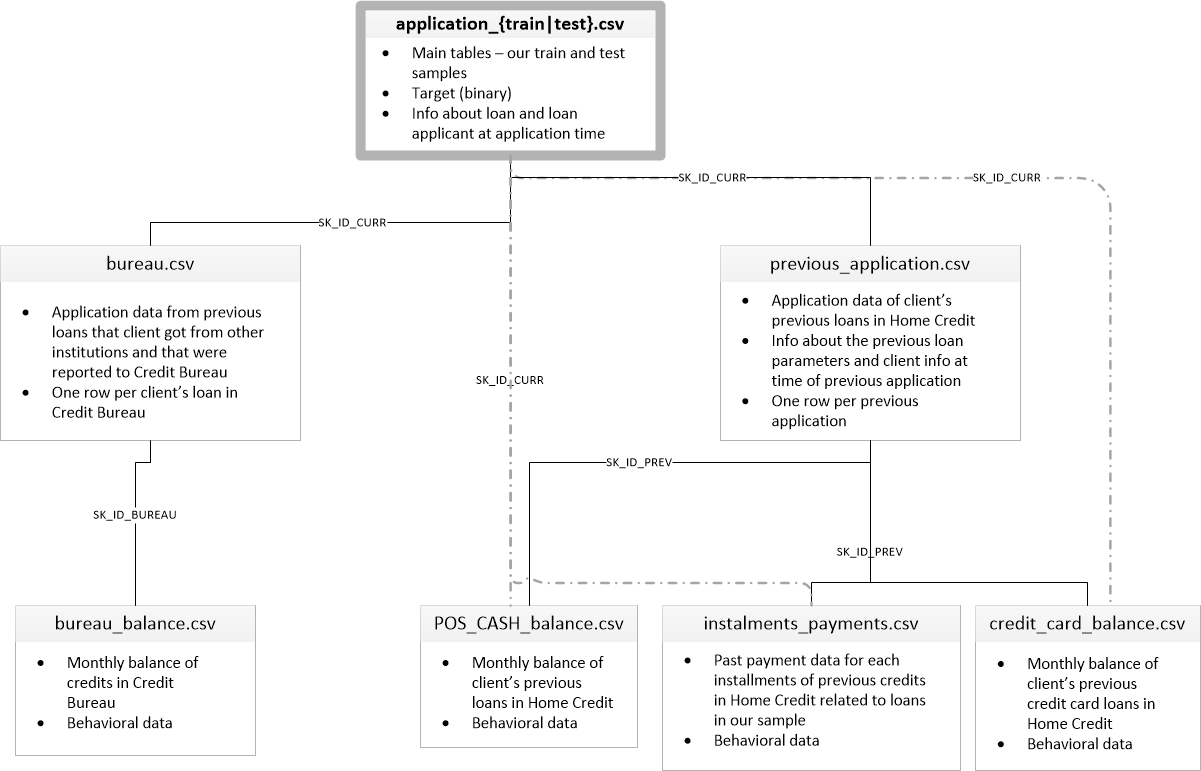

Terdapat 7 tabel yaitu application_train|test, bureau, bureau_balance, previous_application, POSH_Cash_balance, instalments_payments, dan credit_card_balance.


## Load Dataset

In [ ]:
# Exploratory Data Analysis adalah proses di mana kami menghitung statistik dan membuat angka untuk menemukan tren, anomali, pola, atau hubungan dalam data.
# Tujuan EDA adalah untuk mempelajari apa yang dapat disampaikan oleh data, hal ini biasanya dimulai dengan ikhtisar tingkat tinggi, kemudian menyempit ke area tertentu saat kami menemukan area data yang menarik.
# Temuannya mungkin menarik dengan sendirinya, atau dapat digunakan untuk menginformasikan pilihan pemodelan kami, seperti dengan membantu kami memutuskan fitur mana yang akan digunakan.

# Input library
import gc
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from xgboost import cv
import plotly.express as px
from sklearn.base import clone
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier,DMatrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,roc_auc_score,confusion_matrix
%matplotlib inline

import sys
import warnings
warnings.filterwarnings("ignore")

# To visualizer all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
# Saving dataset to dataframe
test = pd.read_csv('application_test.csv')
train = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')
pos_cash = pd.read_csv('POS_CASH_balance.csv')
credit_card = pd.read_csv('credit_card_balance.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
installments_payments = pd.read_csv('installments_payments.csv')

In [ ]:
# Input dataset
dataset = {
    "test":test,
    "train":train,
    "bureau":bureau,
    "pos_cash":pos_cash,
    "credit_card":credit_card,
    "bureau_balance":bureau_balance,
    "previous_application":previous_application,
    "installments_payments":installments_payments,
}

In [ ]:
# Show total rows and columns data
print("(baris, kolom)")
for key,d in dataset.items():
    print(key," ---> ",d.shape)

# Overcome performance issue
del(dataset)

(baris, kolom)
test  --->  (9647, 121)
train  --->  (9692, 122)
bureau  --->  (21183, 17)
pos_cash  --->  (640322, 8)
credit_card  --->  (164735, 23)
bureau_balance  --->  (1296516, 3)
previous_application  --->  (72557, 37)
installments_payments  --->  (295936, 8)


## Information of Dataset

In [ ]:
# TRAIN DATASET
print('     Information of Dataset Train     ')
print('______________________________________')
print(' ')

# Check Rows & Columns
print('      Number of data:    ', train.shape[0])
print('      Number of columns: ', train.shape[1])

# Check Typedata
print('______________________________________')
print(train.dtypes)

# Displaying the contents of the csv file
train.head()

     Information of Dataset Train     
______________________________________
 
      Number of data:     9692
      Number of columns:  122
______________________________________
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MOND

In [ ]:
# Descriptif Statistics of dataset
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,9692.000000,9692.000000,9692.000000,9.692000e+03,9.692000e+03,9692.000000,9.685000e+03,9692.000000,9691.000000,9691.000000,9691.000000,9691.000000,3228.000000,9691.0,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.00000,9691.000000,9691.000000,9691.000000,4230.000000,9665.000000,7766.000000,4791.000000,4061.000000,4977.000000,3260.000000,2937.000000,4555.000000,4850.000000,4913.000000,3114.000000,3985.000000,3067.000000,4848.000000,2972.000000,4392.000000,4791.000000,4061.000000,4977.000000,3260.000000,2937.000000,4555.000000,4850.000000,4913.000000,3114.000000,3985.000000,3067.000000,4848.000000,2972.000000,4392.000000,4791.000000,4061.000000,4977.000000,3260.000000,2937.000000,4555.000000,4850.000000,4913.000000,3114.000000,3985.000000,3067.000000,4848.000000,2972.000000,4392.000000,5041.000000,9651.000000,9651.000000,9651.000000,9651.000000,9691.000000,9691.0,9691.000000,9691.000000,9691.000000,9691.00000,9691.0,9691.000000,9691.000000,9691.0,9691.000000,9691.0,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,9691.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000
mean,105652.346574,0.077899,0.415600,1.676262e+05,6.013997e+05,27100.230396,5.410311e+05,0.020931,-16029.072129,62808.813435,-4987.793417,-2982.692601,11.844796,1.0,0.822516,0.201424,0.998143,0.283562,0.054793,2.156124,2.045403,2.024662,12.076256,0.016613,0.049737,0.03818,0.081416,0.234754,0.178929,0.504916,0.515932,0.512167,0.117377,0.088818,0.978936,0.751364,0.043901,0.077277,0.150504,0.226192,0.232380,0.066810,0.098845,0.107003,0.008438,0.028242,0.113655,0.087785,0.977900,0.758086,0.041438,0.072750,0.145954,0.222107,0.228427,0.065285,0.103175,0.105028,0.007772,0.027116,0.118071,0.088493,0.978940,0.754688,0.044075,0.076905,0.150223,0.225898,0.232227,0.067797,0.100275,0.108534,0.008379,0.028428,0.101671,1.410424,0.150658,1.394778,0.105896,-959.328036,0.0,0.710247,0.000206,0.015891,0.08544,0.0,0.076360,0.003508,0.0,0

In [ ]:
# TEST DATASET
print('     Information of Dataset Test      ')
print('______________________________________')
print(' ')

# Check Rows & Columns
print('      Number of data:    ', test.shape[0])
print('      Number of columns: ', test.shape[1])

# Check Typedata
print('______________________________________')
print(test.dtypes)

# Displaying the contents of the csv file
test.head()

     Information of Dataset Test      
______________________________________
 
      Number of data:     9647
      Number of columns:  121
______________________________________
SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,10

In [ ]:
# Descriptif Statistics of dataset
test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,9647.000000,9647.000000,9.647000e+03,9.647000e+03,9638.000000,9.647000e+03,9647.000000,9647.000000,9647.000000,9647.000000,9647.000000,3217.000000,9647.0,9647.000000,9647.00000,9647.000000,9647.000000,9647.000000,9647.000000,9647.000000,9647.000000,9647.00000,9647.000000,9647.000000,9647.000000,9647.000000,9647.000000,9647.000000,5543.000000,9646.000000,7925.000000,4857.000000,4110.000000,5055.000000,3291.000000,3006.000000,4620.000000,4918.000000,4973.000000,3163.000000,4025.000000,3121.000000,4923.000000,2992.000000,4427.000000,4857.000000,4110.000000,5055.000000,3291.000000,3006.000000,4620.000000,4918.000000,4973.000000,3163.000000,4025.000000,3121.000000,4923.000000,2992.000000,4427.000000,4857.000000,4110.000000,5055.000000,3291.000000,3006.000000,4620.000000,4918.000000,4973.000000,3163.000000,4025.000000,3121.000000,4923.000000,2992.000000,4427.000000,5091.000000,9642.000000,9642.000000,9642.000000,9642.000000,9646.000000,9646.0,9646.000000,9646.0,9646.000000,9646.000000,9646.000000,9646.000000,9646.000000,9646.0,9646.000000,9646.0,9646.0,9646.0,9646.0,9646.0,9646.0,9646.000000,9646.0,9646.0,9646.0,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000
mean,134984.475174,0.391313,1.780710e+05,5.131459e+05,29234.183233,4.590556e+05,0.021252,-16069.989219,66744.736187,-4972.525137,-3044.039598,11.556730,1.0,0.811755,0.20877,0.998341,0.262672,0.165751,2.142946,2.044055,2.018659,11.98103,0.020110,0.054421,0.041775,0.078366,0.220898,0.169275,0.499093,0.516291,0.496108,0.122171,0.089492,0.979110,0.750284,0.049831,0.084620,0.152478,0.234125,0.236675,0.067071,0.104269,0.112714,0.007879,0.029539,0.118891,0.088645,0.978495,0.757649,0.047727,0.079825,0.148086,0.229849,0.232001,0.066269,0.109207,0.110994,0.007259,0.028636,0.122536,0.088901,0.979099,0.753482,0.049719,0.083273,0.151865,0.233447,0.235847,0.068035,0.105400,0.113797,0.007726,0.029421,0.108796,1.459345,0.147065,1.447729,0.103505,-1059.086564,0.0,0.782086,0.0,0.015136,0.091333,0.000104,0.087808,0.004147,0.0,0.001555,0.0,0.0,0.0,0.0,0.0,0.0,0.001659,0.0,0.0,0.0,0.002837,0.002

In [ ]:
# BUREAU DATASET
print('   Information of Dataset Bureau   ')
print('___________________________________')
print(' ')

# Check Rows & Columns
print('    Number of data:    ', bureau.shape[0])
print('    Number of columns: ', bureau.shape[1])

# Check Typedata
print('___________________________________')
print(bureau.dtypes)

# Displaying the contents of the csv file
bureau.head()

   Information of Dataset Bureau   
___________________________________
 
    Number of data:     21183
    Number of columns:  17
___________________________________
SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE        float64
AMT_ANNUITY               float64
dtype: object


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131.0,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20.0,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16.0,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16.0,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21.0,NaN


In [ ]:
# Descriptif Statistics of dataset
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,21183.000000,2.118300e+04,21183.000000,21183.000000,19775.000000,13028.000000,7624.000000,21183.000000,2.118300e+04,1.800800e+04,1.388800e+04,21182.000000,21182.000000,6.003000e+03
mean,276642.000283,5.679894e+06,-1118.519520,1.399518,541.330468,-998.190513,3164.748396,0.006940,3.568143e+05,1.421326e+05,6.711328e+03,49.227370,-572.234728,1.548932e+04
std,102823.023073,2.954382e+05,785.684912,49.846162,4906.025399,707.793727,18226.570754,0.101908,9.086155e+05,6.252145e+05,4.413049e+04,3032.684918,700.316275,9.825609e+04
min,100053.000000,5.189671e+06,-2922.000000,0.000000,-2843.000000,-2843.000000,0.000000,0.000000,0.000000e+00,-1.323248e+04,-1.102936e+05,0.000000,-41857.000000,0.000000e+00
25%,185764.000000,5.714991e+06,-1626.500000,0.000000,-1087.500000,-1463.250000,0.000000,0.000000,5.400000e+04,0.000000e+00,0.000000e+00,0.000000,-876.000000,0.000000e+00
50%,276580.000000,5.721308e+06,-960.000000,0.000000,-286.000000,-860.000000,0.000000,0.000000,1.349512e+05,0.000000e+00,0.000000e+00,0.000000,-365.000000,4.500000e+02
75%,362992.500000,6.019929e+06,-460.000000,0.000000,528.500000,-413.000000,0.000000,0.000000,3.150000e+05,4.940192e+04,0.000000e+00,0.000000,-32.000000,1.469475e+04
max,456247.000000,6.026006e+06,-2.000000,2625.000000,31196.000000,-1.000000,822038.895000,4.000000,4.500000e+07,1.738731e+07,1.352045e+06,349428.060000,0.000000,4.584550e+06


In [ ]:
# BUREAU BALANCE DATASET
print('Information of Dataset Bureau')
print('_____________________________')
print(' ')

# Check Rows & Columns
print(' Number of data:    ', bureau_balance.shape[0])
print(' Number of columns: ', bureau_balance.shape[1])

# Check Typedata
print('_____________________________')
print(bureau_balance.dtypes)

# Displaying the contents of the csv file
bureau_balance.head()

Information of Dataset Bureau
_____________________________
 
 Number of data:     1296516
 Number of columns:  3
_____________________________
SK_ID_BUREAU        int64
MONTHS_BALANCE    float64
STATUS             object
dtype: object


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0.0,C
1,5715448,-1.0,C
2,5715448,-2.0,C
3,5715448,-3.0,C
4,5715448,-4.0,C


In [ ]:
# Descriptif Statistics of dataset
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,1.296516e+06,1.296515e+06
mean,5.966924e+06,-2.983942e+01
std,4.902840e+05,2.345090e+01
min,5.872600e+04,-9.600000e+01
25%,5.726317e+06,-4.400000e+01
50%,5.921597e+06,-2.400000e+01
75%,6.368923e+06,-1.100000e+01
max,6.834663e+06,0.000000e+00


In [ ]:
# POS CASH BALANCE DATASET
print('Information of Dataset Pos Cash Balance')
print('_______________________________________')
print(' ')

# Check Rows & Columns
print('      Number of data:    ', pos_cash.shape[0])
print('      Number of columns: ', pos_cash.shape[1])

# Check Typedata
print('_______________________________________')
print(pos_cash.dtypes)

# Displaying the contents of the csv file
pos_cash.head()

Information of Dataset Pos Cash Balance
_______________________________________
 
      Number of data:     640322
      Number of columns:  8
_______________________________________
SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                   float64
SK_DPD_DEF               float64
dtype: object


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0.0,0.0
1,1715348,367990,-33,36.0,35.0,Active,0.0,0.0
2,1784872,397406,-32,12.0,9.0,Active,0.0,0.0
3,1903291,269225,-35,48.0,42.0,Active,0.0,0.0
4,2341044,334279,-35,36.0,35.0,Active,0.0,0.0


In [ ]:
# Descriptif Statistics of dataset
pos_cash.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,6.403220e+05,640322.000000,640322.000000,639170.000000,639169.000000,640321.000000,640321.000000
mean,1.903876e+06,278624.674051,-27.356766,20.585617,13.251725,0.378185,0.068114
std,5.355329e+05,102785.049198,23.718241,14.137885,12.981439,16.413977,1.452263
min,1.000001e+06,100002.000000,-96.000000,1.000000,0.000000,0.000000,0.000000
25%,1.434264e+06,189732.500000,-40.000000,10.000000,4.000000,0.000000,0.000000
50%,1.897826e+06,279015.000000,-18.000000,14.000000,9.000000,0.000000,0.000000
75%,2.369037e+06,367928.000000,-10.000000,24.000000,19.000000,0.000000,0.000000
max,2.843497e+06,456255.000000,-1.000000,92.000000,85.000000,2672.000000,268.000000


In [ ]:
# CREDIT CARD BALANCE DATASET
print('Information of Dataset Credit Card Balance')
print('__________________________________________')
print(' ')

# Check Rows & Columns
print('      Number of data:    ', credit_card.shape[0])
print('      Number of columns: ', credit_card.shape[1])

# Check Typedata
print('__________________________________________')
print(credit_card.dtypes)

# Displaying the contents of the csv file
credit_card.head()

Information of Dataset Credit Card Balance
__________________________________________
 
      Number of data:     164735
      Number of columns:  23
__________________________________________
SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          float64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD   

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1.0,0.0,1.0,35.0,Active,0.0,0.0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1.0,0.0,0.0,69.0,Active,0.0,0.0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0.0,0.0,0.0,30.0,Active,0.0,0.0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1.0,0.0,0.0,10.0,Active,0.0,0.0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1.0,0.0,1.0,101.0,Active,0.0,0.0


In [ ]:
# Descriptif Statistics of dataset
credit_card.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,1.647350e+05,164735.000000,164735.000000,164735.000000,1.647350e+05,1.273890e+05,1.647340e+05,127389.000000,1.273890e+05,155222.000000,1.270490e+05,1.647340e+05,164734.000000,164734.000000,164734.000000,127389.000000,164734.000000,127389.000000,127389.000000,155222.000000,164734.000000,164734.000000
mean,1.904036e+06,278676.260424,-30.020099,52556.818739,1.524874e+05,5.170907e+03,6.119921e+03,245.651279,2.489157e+03,3161.154717,9.730783e+03,6.908954e+03,50449.542228,52381.621879,52389.265714,0.271083,0.593854,0.004671,0.492193,20.976505,9.447867,0.315745
std,5.369266e+05,102819.556459,26.916324,102668.387260,1.698674e+05,2.638409e+04,3.052363e+04,6962.607445,1.889532e+04,5416.194031,3.518629e+04,3.065855e+04,99022.938491,102359.515072,102365.722519,1.022487,2.980973,0.080730,3.098813,21.208638,102.245755,21.967086
min,1.000094e+06,100011.000000,-96.000000,-135359.010000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-135867.105000,-133442.235000,-133442.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.430399e+06,189734.000000,-49.000000,0.000000,4.500000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.252800e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,1.896933e+06,279024.000000,-19.000000,0.000000,1.125000e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.713330e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000
75%,2.370934e+06,368082.000000,-7.000000,73175.062500,1.800000e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,5625.000000,9.000000e+03,6.750000e+03,69269.028750,72980.302500,73049.467500,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000
max,2.843477e+06,456250.000000,-1.000000,959924.475000,1.350000e+06,1.305000e+06,1.440180e+06,761940.000000,1.440180e+06,56250.000000,1.125000e+06,1.068750e+06,900000.000000,957233.475000,957233.475000,33.000000,142.000000,6.000000,142.000000,116.000000,3045.000000,3045.000000


In [ ]:
# PREVIOUS APPLICATION DATASET
print('Information of Dataset Previous Application')
print('___________________________________________')
print(' ')

# Check Rows & Columns
print('        Number of data:    ', previous_application.shape[0])
print('        Number of columns: ', previous_application.shape[1])

# Check Typedata
print('___________________________________________')
print(previous_application.dtypes)

# Displaying the contents of the csv file
previous_application.head()

Information of Dataset Previous Application
___________________________________________
 
        Number of data:     72557
        Number of columns:  37
___________________________________________
SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START        float64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY         float64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                  float64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE      

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.0,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,Y,1.0,NaN,NaN,NaN,Repairs,Refused,-781.0,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Descriptif Statistics of dataset
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,7.255700e+04,72557.000000,57191.000000,7.255600e+04,7.255600e+04,3.583100e+04,5.694600e+04,72556.000000,72556.000000,35831.000000,239.000000,239.000000,72556.000000,7.255600e+04,57190.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000
mean,1.922022e+06,279010.659674,15503.616942,1.691699e+05,1.888320e+05,6.525234e+03,2.155632e+05,12.479395,0.996513,0.079247,0.200240,0.789663,-900.489787,3.691887e+02,15.540462,344170.551742,13828.938021,31558.373210,76131.001004,81011.916209,0.325215
std,5.358969e+05,102780.042488,14624.420813,2.826575e+05,3.092077e+05,1.694542e+04,3.029950e+05,3.323145,0.058948,0.107645,0.106977,0.089821,785.241850,1.490227e+04,14.005426,85283.667470,72452.352217,103733.167284,149334.251104,152666.023448,0.468460
min,1.000001e+06,100007.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.059135,0.424419,-2922.000000,-1.000000e+00,0.000000,-2920.000000,-2891.000000,-2800.000000,-2888.000000,-2844.000000,0.000000
25%,1.455906e+06,190090.000000,6131.250000,2.196000e+04,2.595938e+04,0.000000e+00,4.917712e+04,10.000000,1.000000,0.000000,0.160716,0.715645,-1336.000000,-1.000000e+00,6.000000,365243.000000,-1639.000000,-1267.000000,-1333.750000,-1290.000000,0.000000
50%,1.921036e+06,279372.000000,10874.655000,7.149870e+04,7.890525e+04,1.575000e+03,1.046970e+05,12.000000,1.000000,0.049798,0.189136,0.835095,-601.000000,1.000000e+01,12.000000,365243.000000,-823.000000,-366.000000,-537.000000,-501.000000,0.000000
75%,2.389066e+06,368516.000000,19738.890000,1.800000e+05,1.983915e+05,7.762500e+03,2.250000e+05,15.000000,1.000000,0.108909,0.193330,0.852537,-293.000000,1.000000e+02,18.000000,365243.000000,-407.000000,111.000000,-75.000000,-48.000000,1.000000
max,2.845377e+06,456254.000000,234478.395000,3.826372e+06,4.104351e+06,1.035000e+06,3.826372e+06,23.000000,1.000000,0.948445,1.000000,0.867336,-2.000000,4.000000e+06,72.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
# INSTALLMENTS PAYMENTS DATASET
print('Information of Dataset Installments Payments')
print('____________________________________________')
print(' ')

# Check Rows & Columns
print('        Number of data:    ', installments_payments.shape[0])
print('        Number of columns: ', installments_payments.shape[1])

# Check Typedata
print('____________________________________________')
print(installments_payments.dtypes)

# Displaying the contents of the csv file
installments_payments.head()

Information of Dataset Installments Payments
____________________________________________
 
        Number of data:     295936
        Number of columns:  8
____________________________________________
SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
# Descriptif Statistics of dataset
installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,2.959360e+05,295936.000000,295936.000000,295936.000000,295936.000000,295936.000000,2.959360e+05,2.959360e+05
mean,1.900873e+06,150158.540620,0.854063,19.056989,-1044.837924,-1053.562047,1.710888e+04,1.734753e+04
std,5.358410e+05,28952.202913,1.013844,26.968290,801.821586,801.392195,5.259264e+04,5.737353e+04
min,1.000005e+06,100002.000000,0.000000,1.000000,-2922.000000,-3026.000000,0.000000e+00,0.000000e+00
25%,1.430795e+06,125100.000000,0.000000,4.000000,-1659.000000,-1667.000000,4.164750e+03,3.375000e+03
50%,1.894890e+06,150108.500000,1.000000,8.000000,-823.000000,-832.000000,8.851118e+03,8.100000e+03
75%,2.366404e+06,175338.000000,1.000000,19.000000,-361.000000,-370.000000,1.659433e+04,1.596260e+04
max,2.843491e+06,199999.000000,35.000000,244.000000,-2.000000,-2.000000,2.544234e+06,2.544234e+06


## Checking Data Unbalance

In [ ]:
# 0 = Loan is repayed
# 1 = Loan is not repayed
train["TARGET"].value_counts()

0    8937
1     755
Name: TARGET, dtype: int64

In [ ]:
# Percentage calculation
print(" Percentage  ")
print("-------------")
(train["TARGET"].value_counts()/train["TARGET"].count())*100

 Percentage  
-------------


0    92.21007
1     7.78993
Name: TARGET, dtype: float64

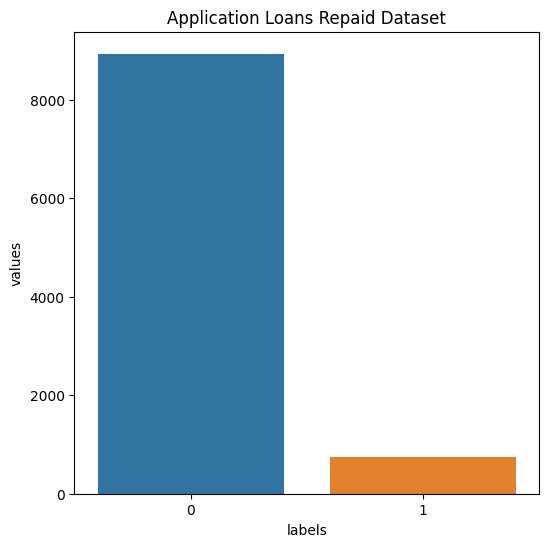

In [ ]:
# Plot between Loan is repayed and not repayed
temp = train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application Loans Repaid Dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
plt.show()

## Explore Dataset

**Exploratory Data Analysis**

### Loan Types

**EDA DARI PERBANDINGAN PERSENTASE PINJAMAN (BERDASARKAN JENIS PINJAMAN) DENGAN NILAI TARGET VALUE 1 ATAU PINJAMAN TIDAK DIKEMBALIKAN (GAGAL BAYAR)**

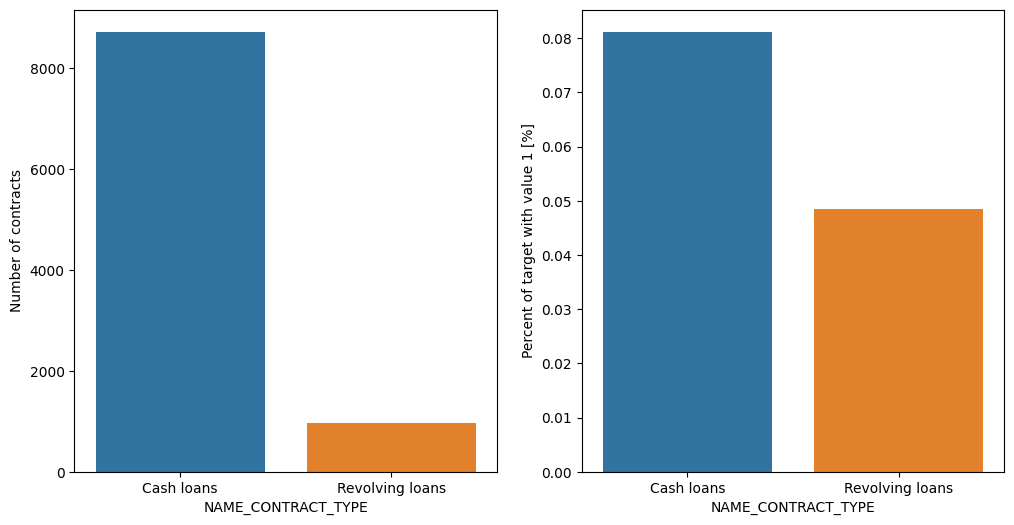

In [ ]:
# Plot based on columns "name of contracts"
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();
plot_stats('NAME_CONTRACT_TYPE')

Pinjaman bergulir jenis kontrak hanyalah sebagian kecil dari jumlah total pinjaman. Pada saat yang sama, sejumlah besar pinjaman Bergulir dibandingkan dengan frekuensinya tidak dilunasi.

### Gender of Customers
Mari kita lihat jenis kelamin klien dan juga, pada plot terpisah, persentase pinjaman (berdasarkan jenis kelamin klien) dengan nilai TARGET 1 (pinjaman tidak dikembalikan).

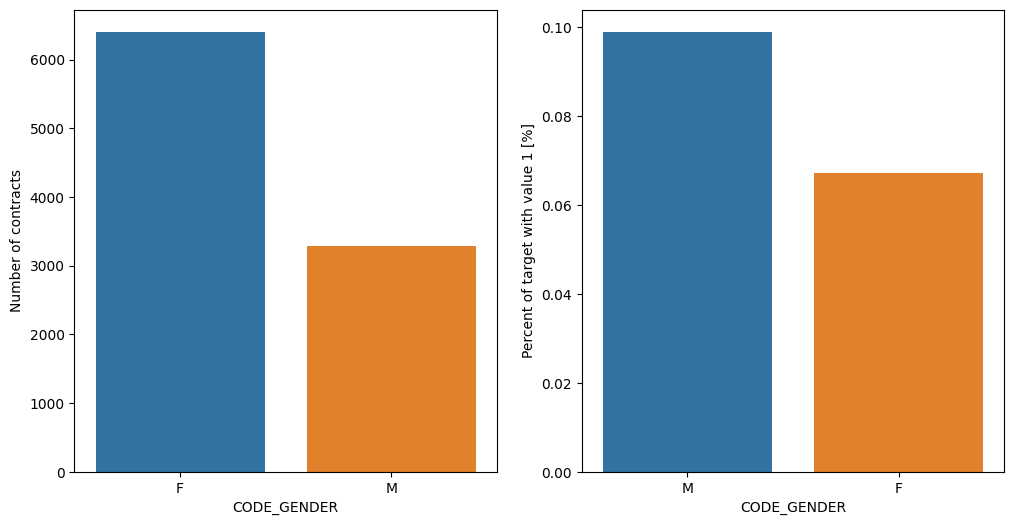

In [ ]:
plot_stats('CODE_GENDER')

Jumlah klien wanita hampir dua kali lipat jumlah klien pria. Dilihat dari persentase kredit macet, laki-laki memiliki peluang lebih tinggi untuk tidak mengembalikan pinjaman mereka.

### Based of Flag Costumer about Own Car or Own Realty
Mari kita periksa Flag yang memberi tahu kita jika klien memiliki mobil atau real estat dan, pada petak terpisah, persentase nilai pinjaman dari Flag ini) dengan nilai TARGET 1 (pinjaman tidak dikembalikan).

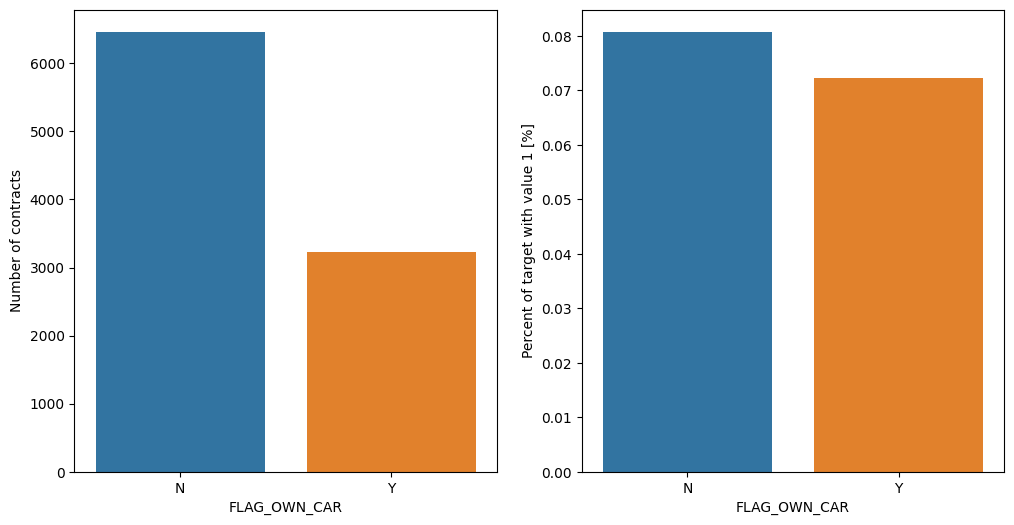

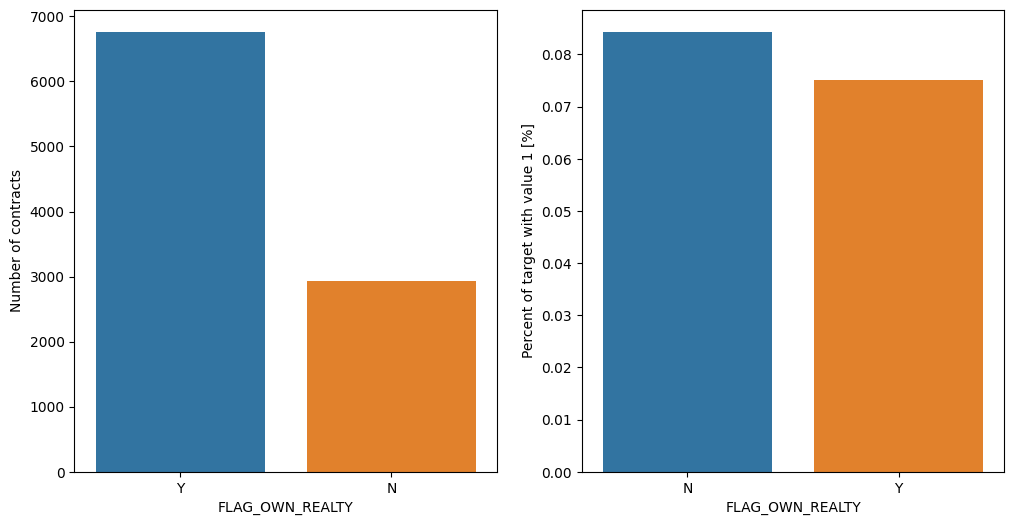

In [ ]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

Klien yang memiliki mobil hampir setengah dari klien yang tidak memilikinya. Kedua kategori tersebut memiliki tingkat tidak-pembayaran sekitar 8%.

Klien yang memiliki real estat lebih dari dua kali lipat klien yang tidak memiliki. Kedua kategori (memiliki real estat atau tidak memiliki) memiliki tingkat tidak membayar kembali sekitar 8%.

### Accompanied Customers

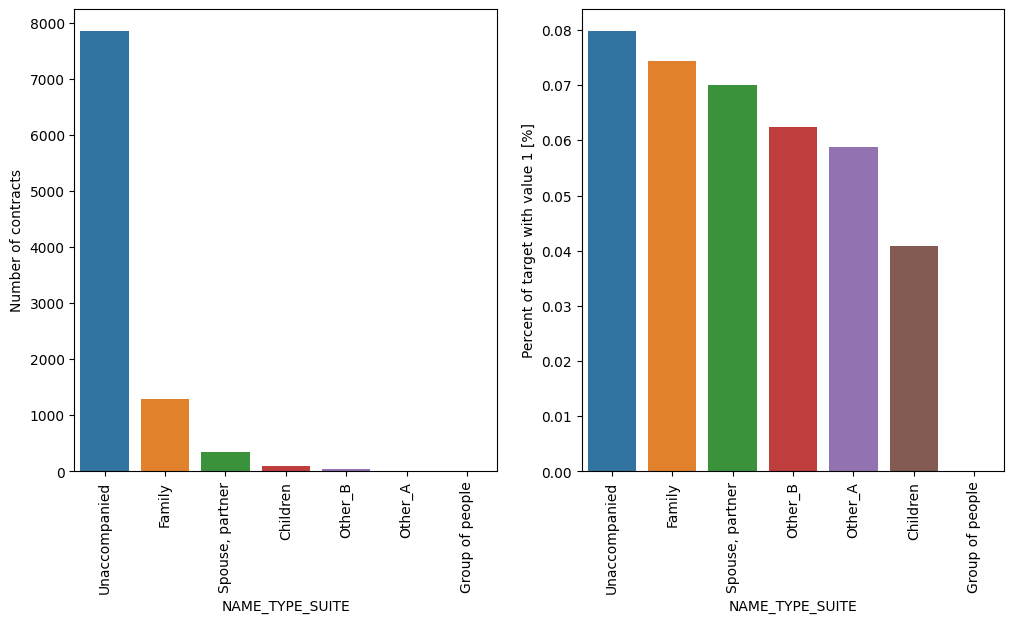

In [ ]:
plot_stats('NAME_TYPE_SUITE',True, True)

Sebagian besar klien tidak ditemani saat mengajukan pinjaman. Dalam hal persentase pinjaman yang tidak dilunasi, klien yang didampingi oleh Other_B dan Other_A lebih kecil kemungkinannya untuk membayar kembali.

### Family Status of Customers

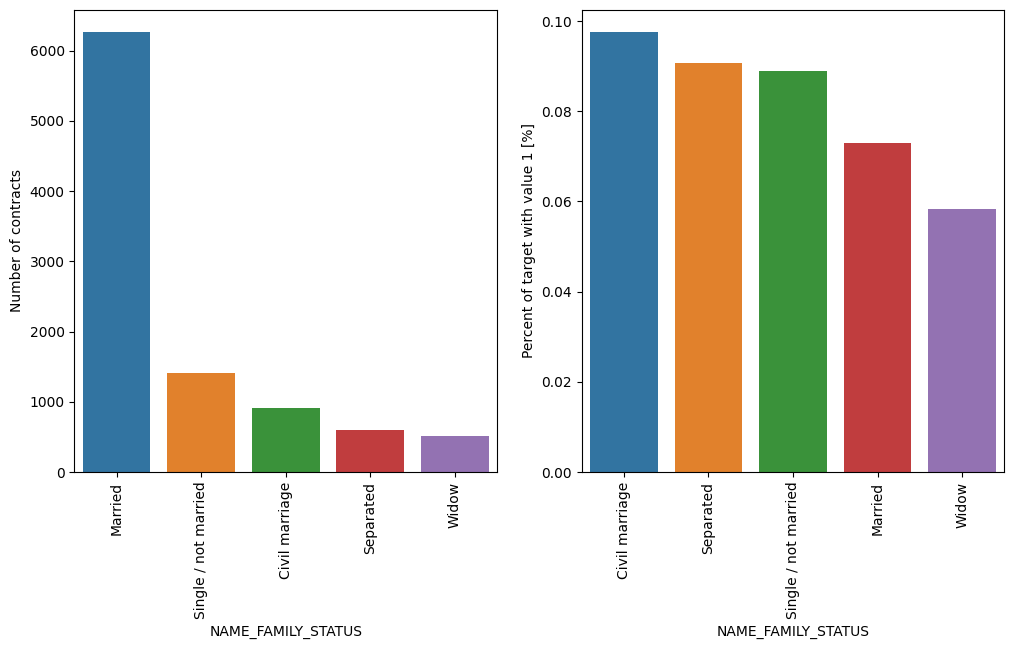

In [ ]:
plot_stats('NAME_FAMILY_STATUS',True, True)

Sebagian besar klien sudah menikah, diikuti Single/belum menikah dan pernikahan sipil.

Dalam hal persentase tidak dilunasi pinjaman, Perkawinan sipil memiliki persentase tidak dilunasi tertinggi (10%), dengan Janda yang terendah (pengecualian tidak diketahui).

### Number of Childrens
Mari kita lihat bagaimana distribusi jumlah anak klien.

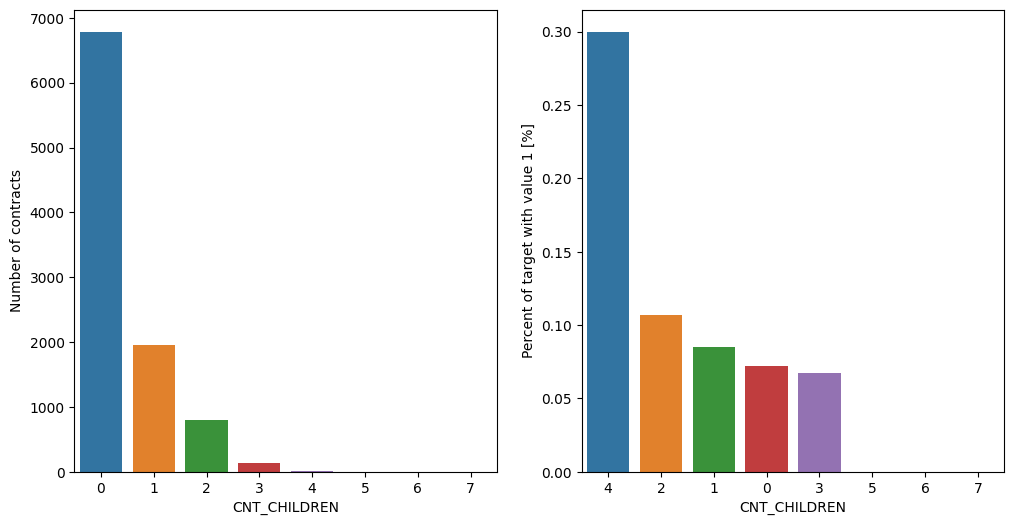

In [ ]:
plot_stats('CNT_CHILDREN')

Sebagian besar klien yang mengambil pinjaman tidak memiliki anak. Jumlah pinjaman yang terkait dengan klien dengan satu anak 4 kali lebih kecil, jumlah pinjaman yang terkait dengan klien dengan dua anak 8 kali lebih kecil; klien dengan 3, 4 anak atau lebih jauh lebih jarang.

Untuk pelunasan, klien tanpa anak, 1, 2, 3, dan 5 anak memiliki persentase tidak membayar rata-rata sekitar (10%). Klien dengan 4 dan 6 anak berada di atas rata-rata dalam hal persentase pinjaman yang tidak dibayar kembali (lebih dari 25% untuk keluarga dengan 6 anak).

Sedangkan untuk klien dengan 9 atau 11 anak, persentase pinjaman yang tidak dilunasi adalah 100%.

### Number of Customer Family Members

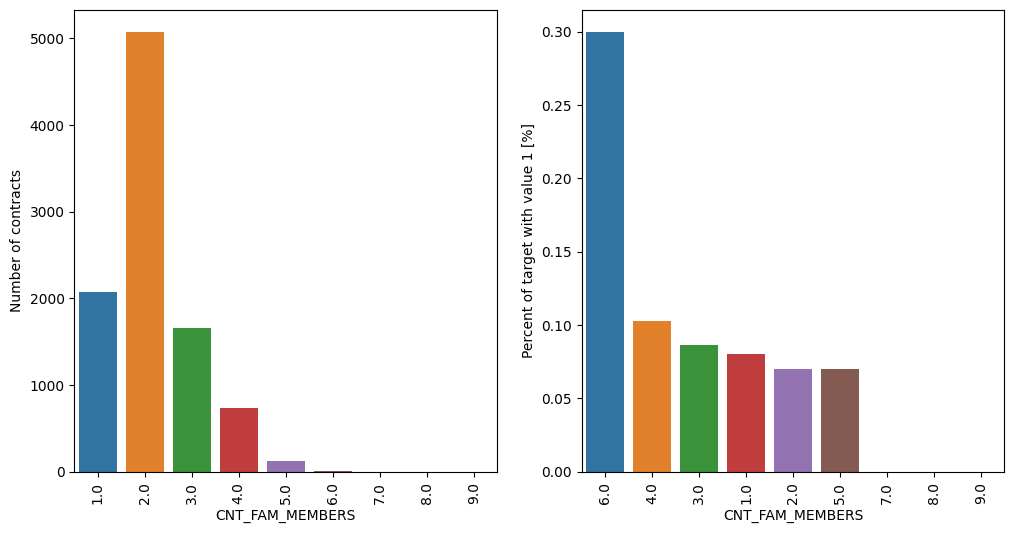

In [ ]:
plot_stats('CNT_FAM_MEMBERS',True)

Klien dengan anggota keluarga 2 paling banyak, diikuti oleh 1 (single), 3 (keluarga dengan satu anak) dan 4.

Klien dengan ukuran keluarga 11 dan 13 memiliki tingkat pembayaran tidak 100%. Keluarga lain dengan 10 atau 8 anggota memiliki persentase tidak membayar kembali pinjaman lebih dari 30%. Keluarga dengan 6 anggota atau kurang memiliki tingkat pengembalian yang mendekati rata-rata 10%.

### Type of Customer Incomes
Mari selidiki jumlah klien dengan jenis pendapatan yang berbeda. Selain itu, mari kita lihat persentase pinjaman yang tidak dikembalikan per jenis pendapatan pelamar.

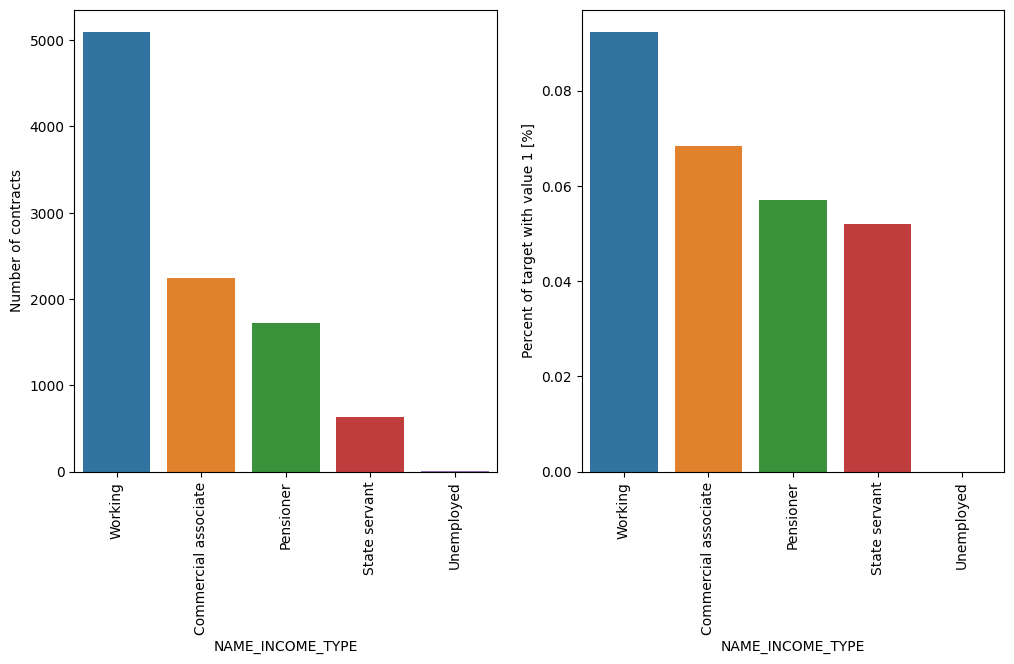

In [ ]:
plot_stats('NAME_INCOME_TYPE',True,True)

Sebagian besar pemohon pinjaman adalah yang berpenghasilan dari Bekerja, diikuti oleh Mitra Usaha, Pensiunan dan PNS.

Pemohon dengan jenis penghasilan Cuti melahirkan memiliki rasio tidak mengembalikan pinjaman hampir 40%, diikuti oleh Pengangguran (37%). Jenis pendapatan lainnya berada di bawah rata-rata 10% karena tidak mengembalikan pinjaman.

### Type of Customer Occupations

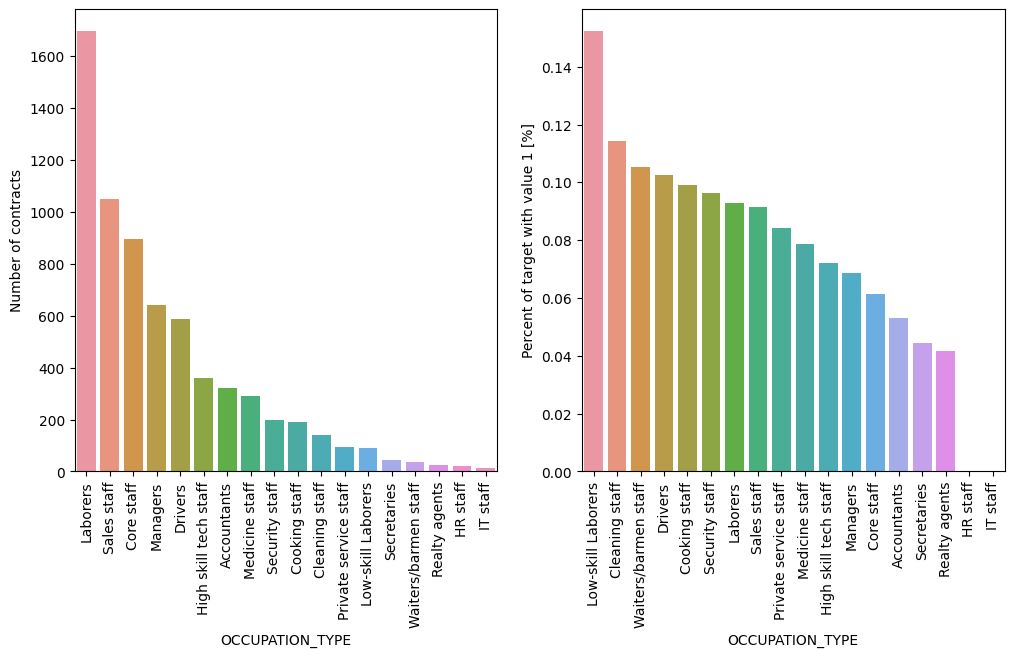

In [ ]:
plot_stats('OCCUPATION_TYPE',True, True)

Sebagian besar pinjaman diambil oleh Buruh, diikuti oleh staf Penjualan. Staf TI mengambil jumlah pinjaman terendah.

Kategori dengan persentase pinjaman yang tidak dilunasi tertinggi adalah Tenaga Kerja Keterampilan Rendah (di atas 17%), diikuti oleh staf Pengemudi dan Pelayan/barmen, staf Keamanan, Tenaga Kerja dan staf Memasak.

### Type of Customer Organizations

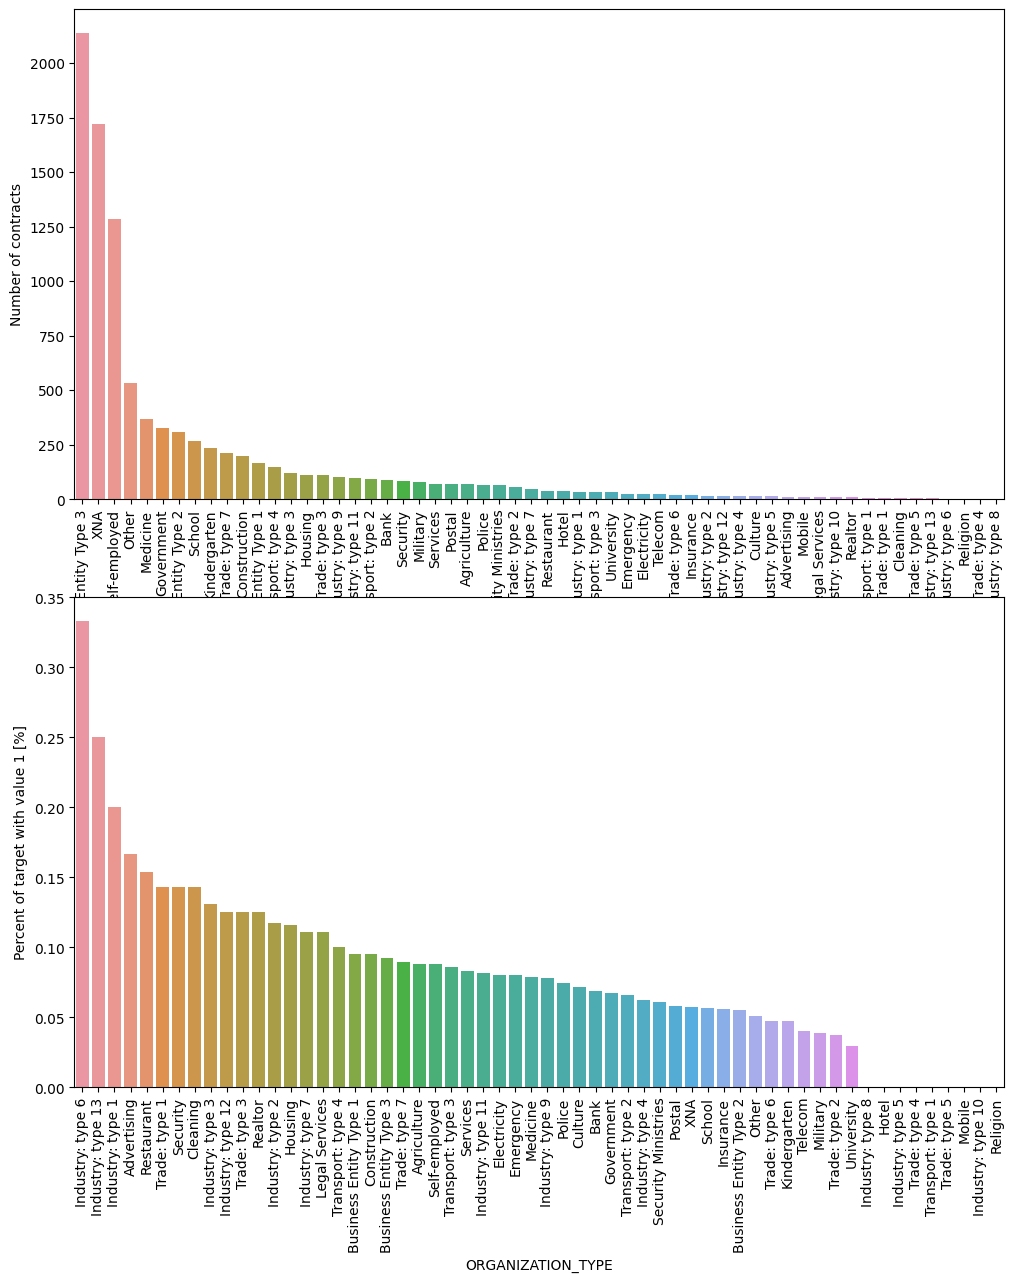

In [ ]:
plot_stats('ORGANIZATION_TYPE',True, False)

Organisasi dengan persentase pinjaman yang tidak dilunasi tertinggi adalah Transportasi: tipe 3 (16%), Industri: tipe 13 (13,5%), Industri: tipe 8 (12,5%) dan Restoran (kurang dari 12%).

### Type of Customer Educations

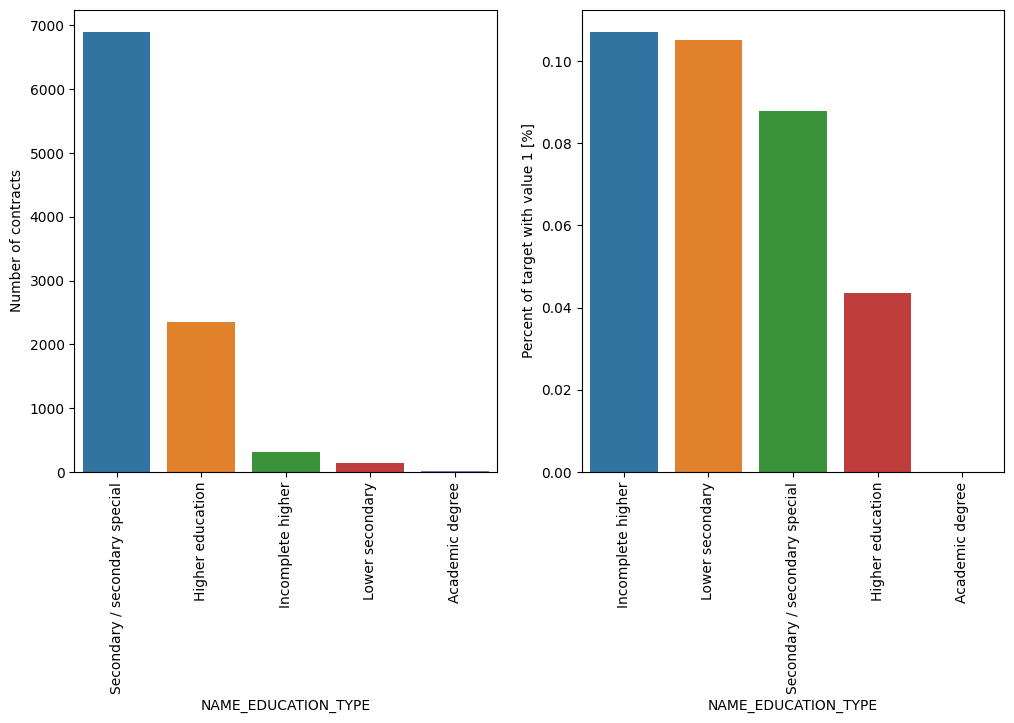

In [ ]:
plot_stats('NAME_EDUCATION_TYPE',True)

Mayoritas klien berpendidikan menengah/menengah khusus, diikuti oleh klien berpendidikan tinggi. Hanya sedikit sekali yang bergelar sarjana.

Kategori menengah bawah, meskipun jarang, memiliki tingkat tidak mengembalikan pinjaman terbesar (11%). Orang-orang dengan gelar Akademik memiliki tingkat tidak membayar kurang dari 2%.

### Type of Customer Housing Names

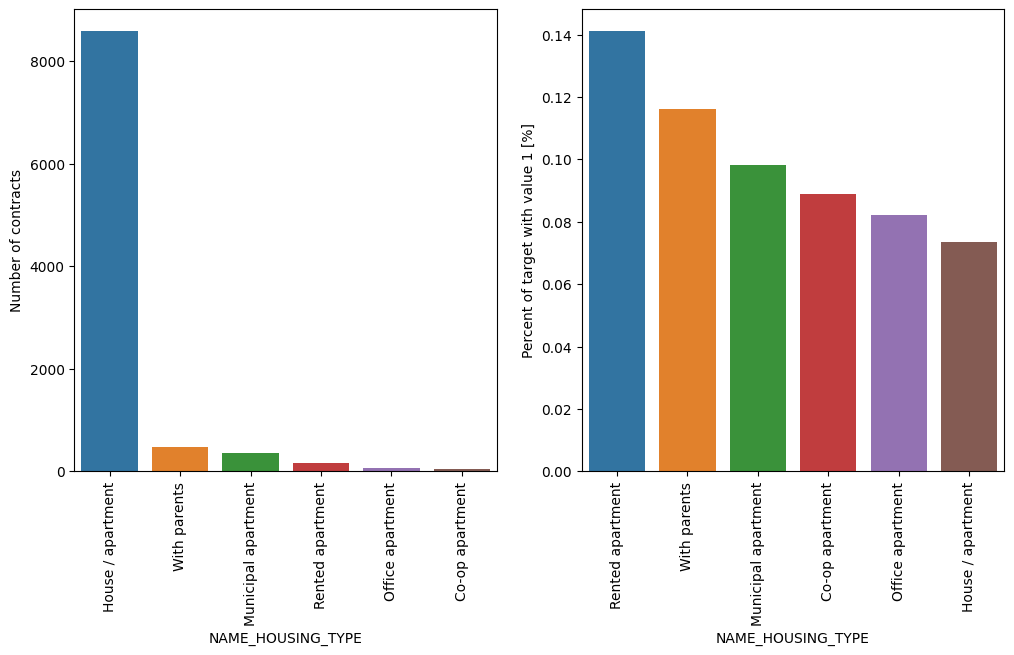

In [ ]:
plot_stats('NAME_HOUSING_TYPE',True)

Lebih dari 250.000 pemohon kredit mendaftarkan rumah mereka sebagai Rumah/apartemen. Kategori berikut memiliki jumlah klien yang sangat kecil (Dengan orang tua, apartemen Kota).

Dari kategori ini, Apartemen sewaan dan Bersama orang tua memiliki tingkat tidak dapat dilunasi lebih dari 10%.

### Total Distribution of Incomes
Mari membuat plot distribusi pendapatan total untuk klien.

In [ ]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

In [ ]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):

    i = 0
    t1 = train.loc[train['TARGET'] != 0]
    t0 = train.loc[train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [ ]:
train['AMT_INCOME_TOTAL'].min(),train['AMT_INCOME_TOTAL'].max()

(25650.0, 1935000.0)

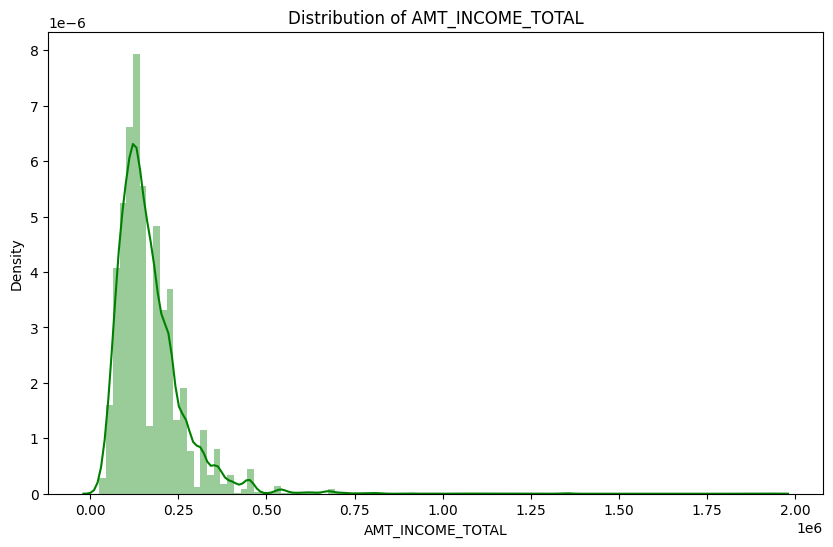

In [ ]:
plot_distribution('AMT_INCOME_TOTAL','green')

Nilai pendapatannya sangat tinggi untuk pengamatan tertentu, jadi mengapa grafiknya muncul seperti ini. Saat kami melakukan deteksi anomali, kami tidak akan menghapusnya.

### Total Distribution of Credits
Mari kita plot distribusi kredit.

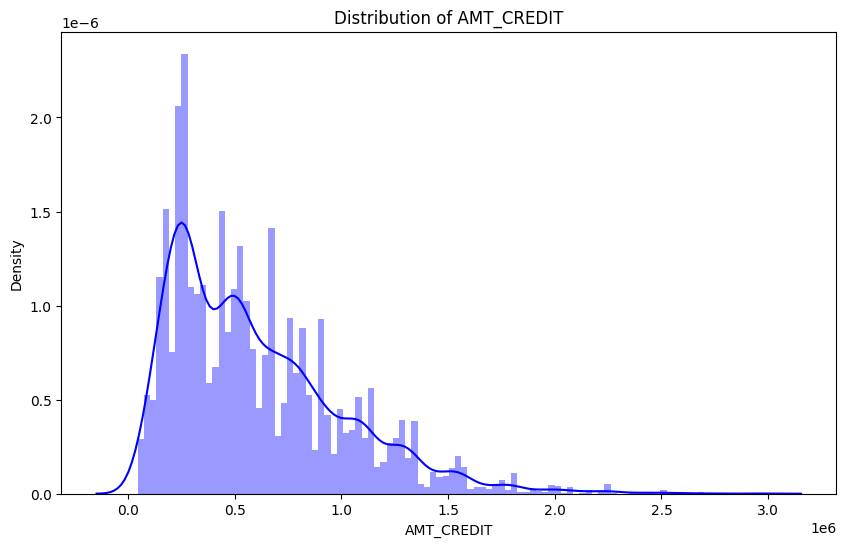

In [ ]:
plot_distribution('AMT_CREDIT','blue')

### Total Distribution of Annuity
Mari plot distribusi anuitas.

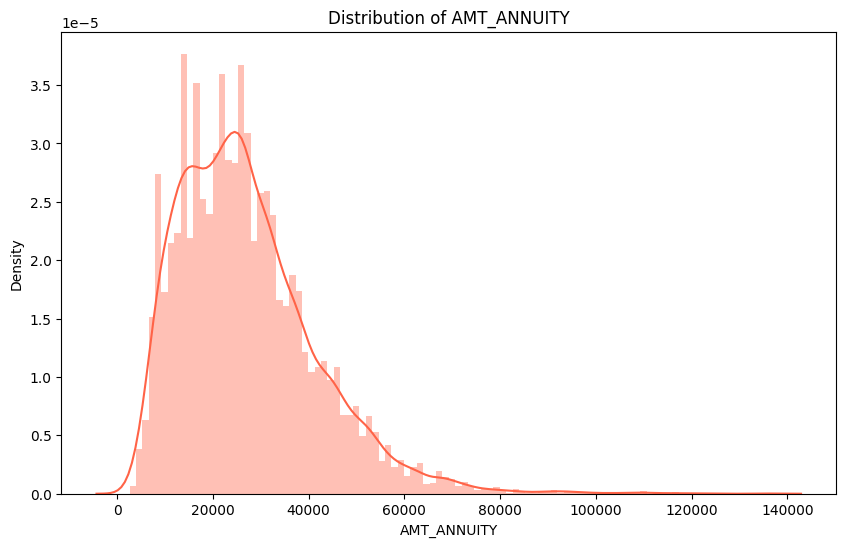

In [ ]:
plot_distribution('AMT_ANNUITY','tomato')

### Total Distribution of Goods Price
Mari kita plot distribusi harga yang baik.


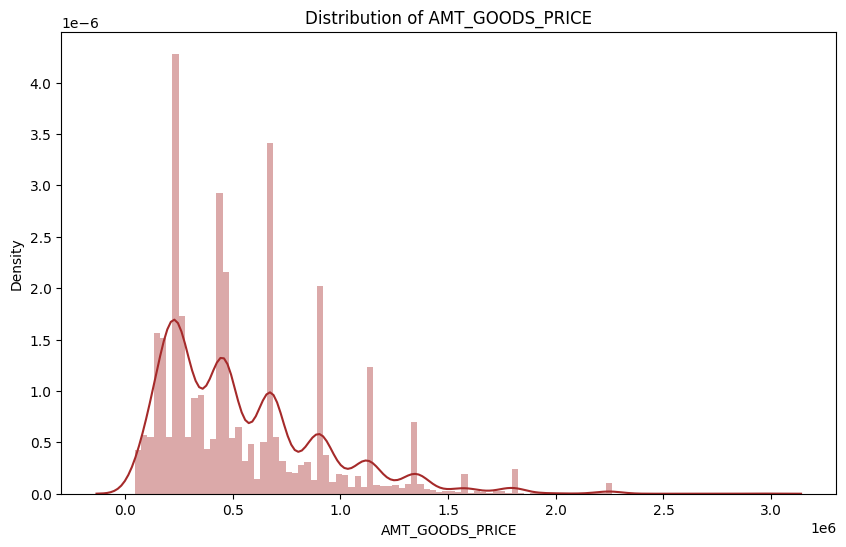

In [ ]:
plot_distribution('AMT_GOODS_PRICE','brown')

### Total Distribution of Days from Birth
Mari plot distribusi jumlah hari sejak lahir.

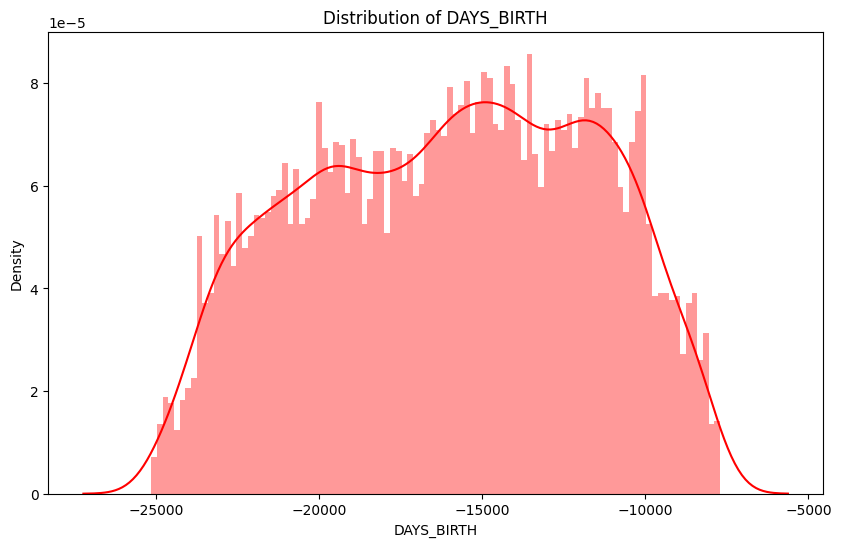

In [ ]:
plot_distribution('DAYS_BIRTH','red')

Nilai negatif berarti tanggal lahir di masa lalu. Rentang usia adalah antara kira-kira 20 dan 68 tahun.

Mari menggali lebih dalam tentang usia

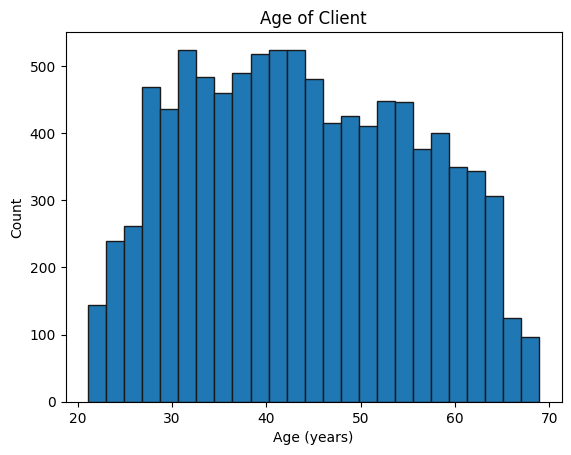

In [ ]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])

# Plot the distribution of ages in years
plt.hist(train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Tidak ada outlier karena semua usia masuk akal. mari kita visualisasikan efek umur pada target, selanjutnya kita akan membuat plot estimasi densitas kernel (KDE) yang diwarnai dengan nilai target.

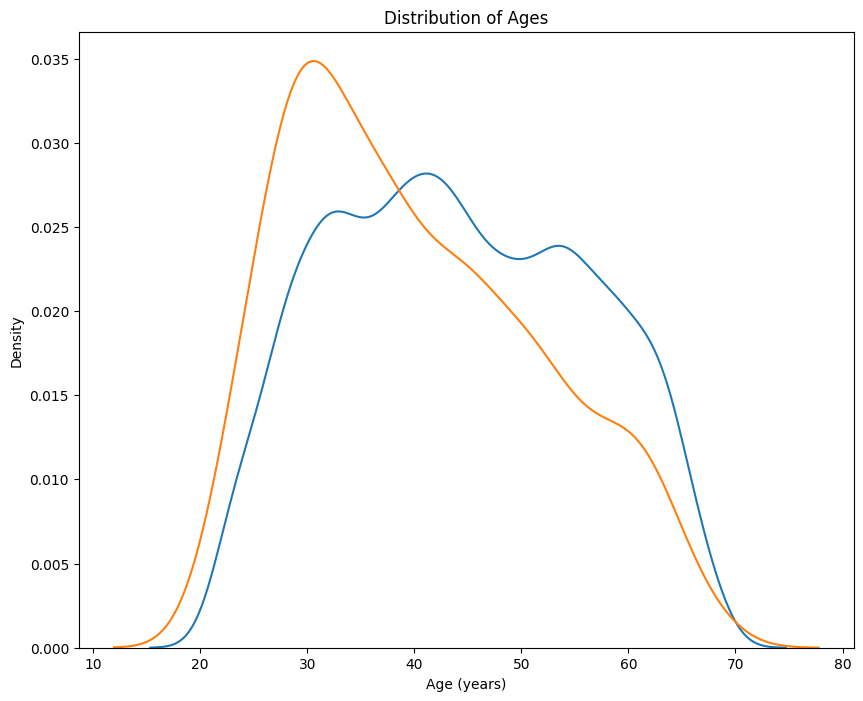

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Kurva target == 1 condong ke ujung rentang yang lebih muda. Meskipun ini bukan korelasi yang signifikan (koefisien korelasi -0,07), variabel ini kemungkinan besar akan berguna dalam model pembelajaran mesin karena memengaruhi target.

Jadi, Ada kecenderungan yang jelas: pelamar yang lebih muda lebih mungkin untuk tidak melunasi pinjaman! Ini adalah informasi yang dapat langsung digunakan oleh bank: karena klien yang lebih muda cenderung tidak dapat melunasi pinjaman, mungkin mereka harus diberi lebih banyak panduan atau tip perencanaan keuangan. Ini tidak berarti bank harus mendiskriminasi nasabah yang lebih muda, tetapi akan bijaksana untuk mengambil tindakan pencegahan untuk membantu nasabah yang lebih muda membayar tepat waktu.

### Total Distribution of Days Employed
Mari kita mewakili distribusi jumlah hari kerja.

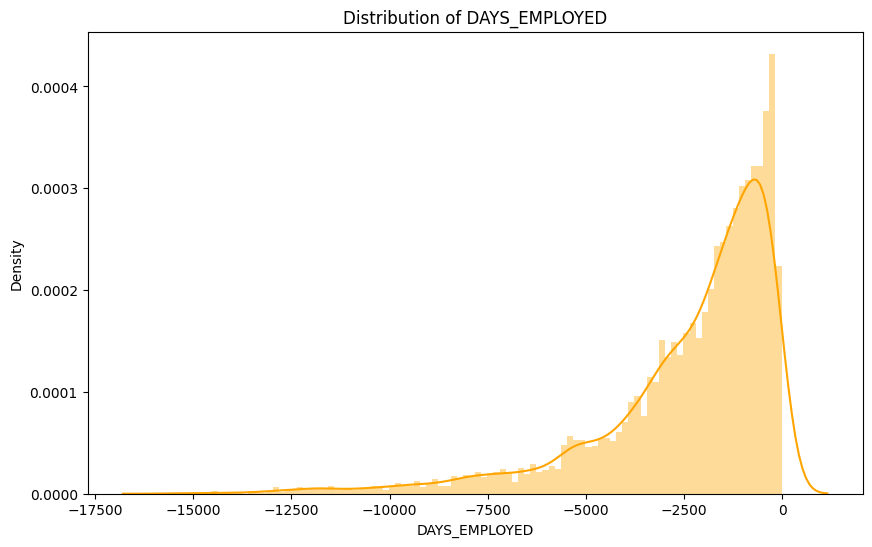

In [ ]:
# Replace the anomalous values with nan
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plot_distribution('DAYS_EMPLOYED','orange')

### Total Distribution of Days Registration
Plot the distribution of DAYS_REGISTRATION.

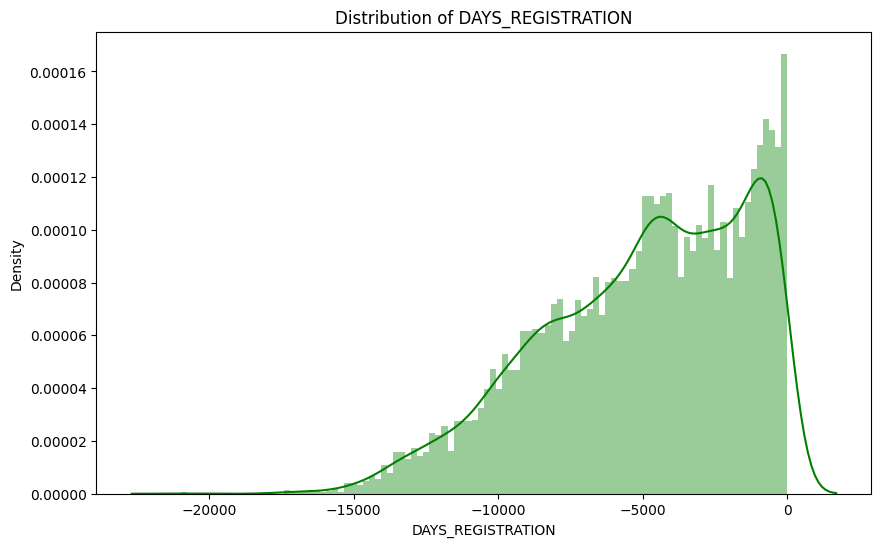

In [ ]:
plot_distribution('DAYS_REGISTRATION','green')

### Total Distribution of Days ID Publish
Plot distribusi of DAYS_ID_PUBLISH.

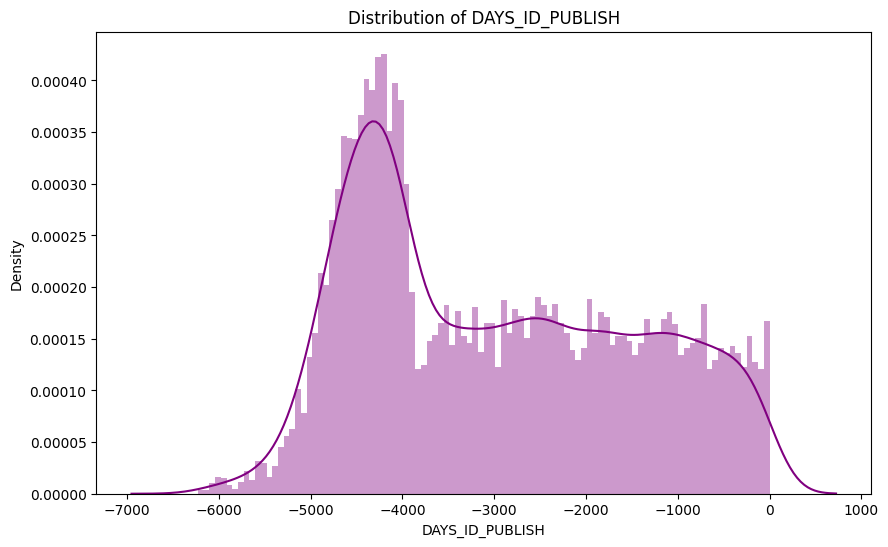

In [ ]:
plot_distribution('DAYS_ID_PUBLISH','purple')

### Comparing Interval Values with TARGET = 1 dan TARGET = 0
Mari bandingkan distribusi nilai interval yang diplot di atas untuk nilai **TARGET = 1** dan **TARGET = 0**.

<Figure size 640x480 with 0 Axes>

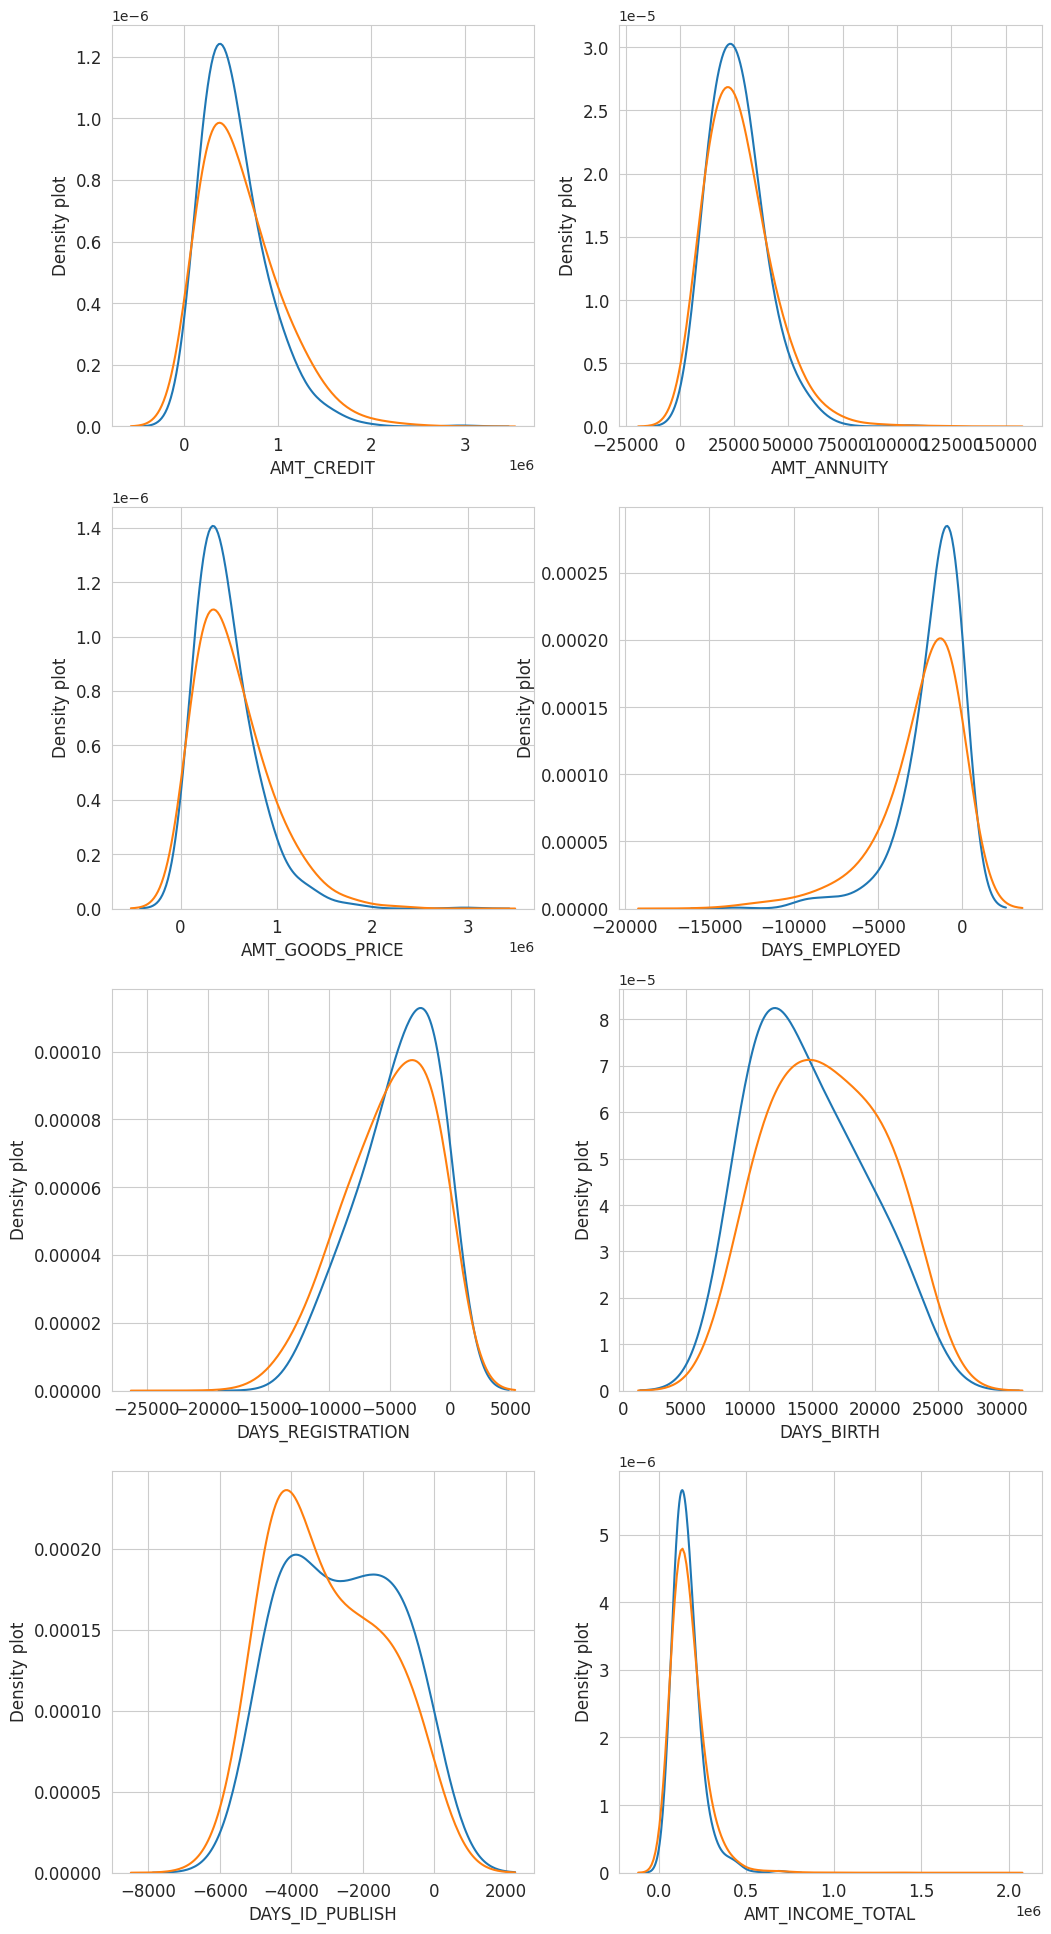

In [ ]:
var = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH','AMT_INCOME_TOTAL']
plot_distribution_comp(var,nrow=4)

### Based of Region not Live and Region not Work
Mari kita wakili nilai wilayah terdaftar dan bukan wilayah hidup dan wilayah terdaftar dan bukan wilayah kerja.

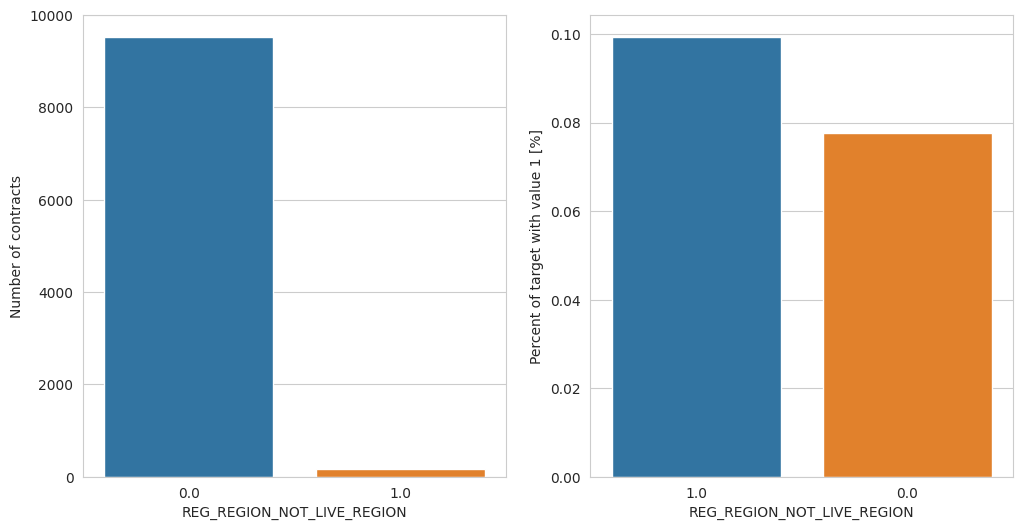

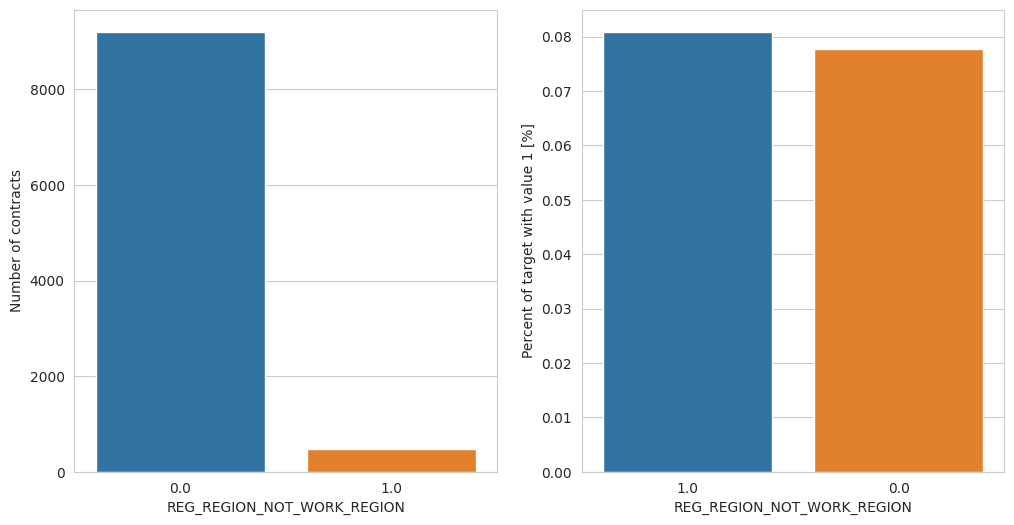

In [ ]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Sangat sedikit orang yang terdaftar di wilayah tidak hidup atau tidak bekerja. Secara umum, tingkat tidak kembali sedikit lebih besar untuk kasus ini daripada yang lain (sedikit di atas 8% dibandingkan dengan sekitar 8%)

### Based of City not Live and City not Work
Mari kita wakili nilai Kota terdaftar bukan kota hidup dan bukan kota kerja.

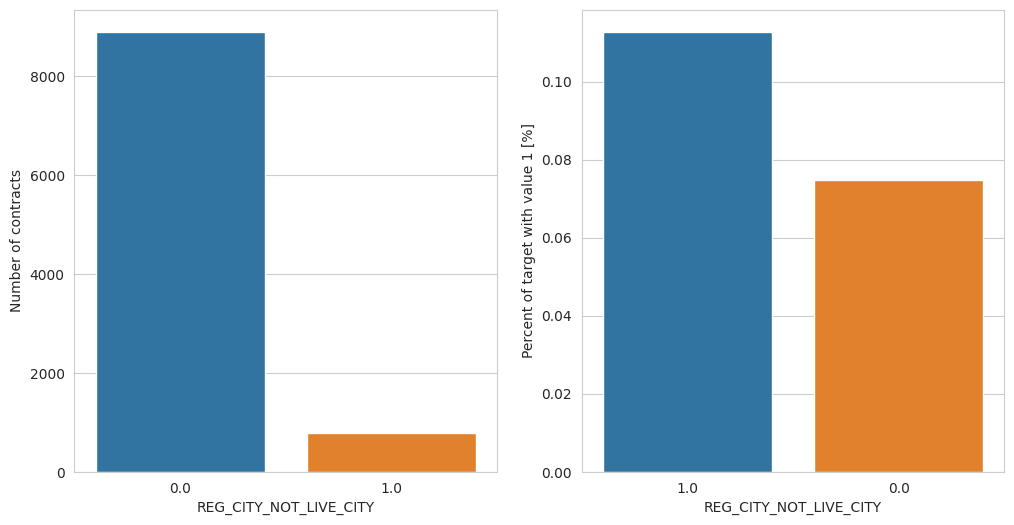

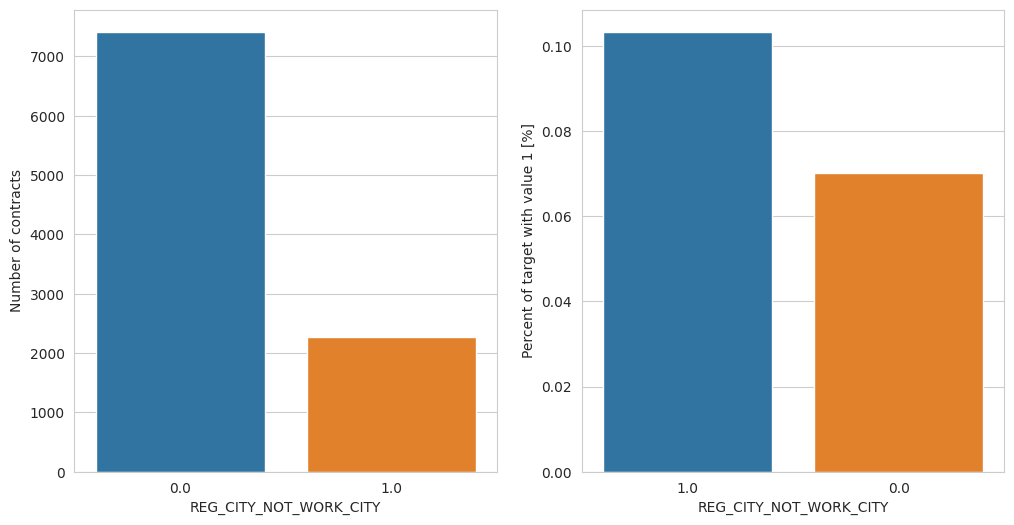

In [ ]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

Secara umum, lebih banyak orang yang mendaftar di kota tempat mereka tinggal atau bekerja (jumlah yang lebih besar mendaftar secara berbeda di kota yang bekerja daripada di kota tempat tinggal).

Mereka yang mendaftar di kota yang berbeda dari kota tempat tinggal atau bekerja lebih sering tidak membayar kembali pinjamannya daripada mereka yang mendaftar di kota yang sama (bekerja 11% atau tinggal 12%).

### Eksterior Source

Terdapat 3 variabel dengan korelasi negatif terkuat dengan target adalah EXT_SOURCE_1, EXT_SOURCE_2, dan EXT_SOURCE_3. Menurut dokumentasi, fitur ini mewakili "skor yang dinormalisasi dari sumber data eksternal".

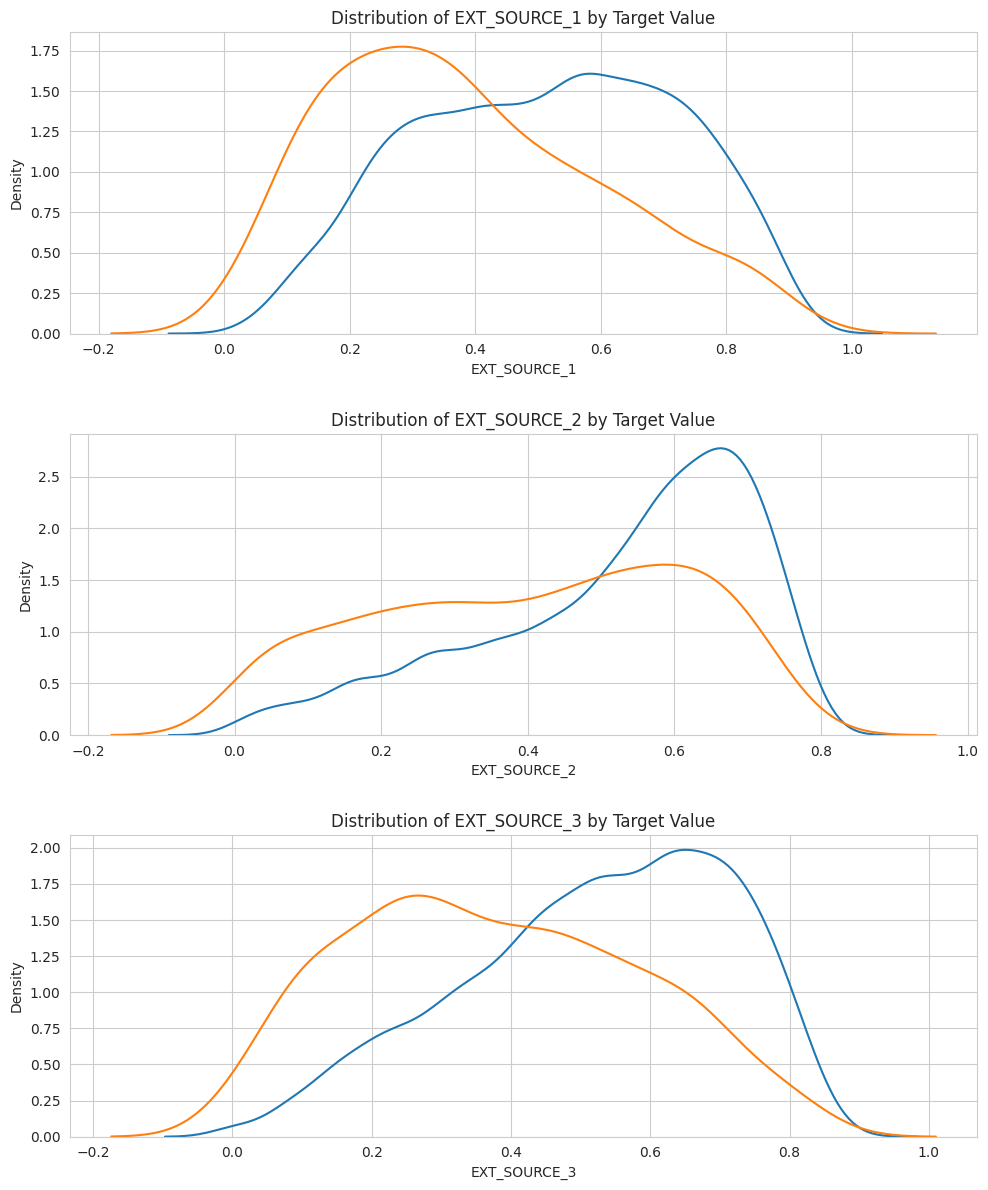

In [ ]:
plt.figure(figsize = (10, 12))

# Iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    # Create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # Plot repaid loans
    sns.kdeplot(train.loc[train['TARGET'] == 0, source], label = 'target == 0')
    # Plot loans that were not repaid
    sns.kdeplot(train.loc[train['TARGET'] == 1, source], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 menampilkan perbedaan terbesar antara nilai target. Kami dapat dengan jelas melihat bahwa fitur ini memiliki beberapa hubungan dengan kemungkinan pemohon membayar kembali pinjaman.

Mari kita lihat juga korelasi fitur EXT_SOURCE dengan target dan satu sama lain.

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.162566,-0.170661,-0.195988
EXT_SOURCE_1,-0.162566,1.000000,0.201193,0.184023
EXT_SOURCE_2,-0.170661,0.201193,1.000000,0.096114
EXT_SOURCE_3,-0.195988,0.184023,0.096114,1.000000


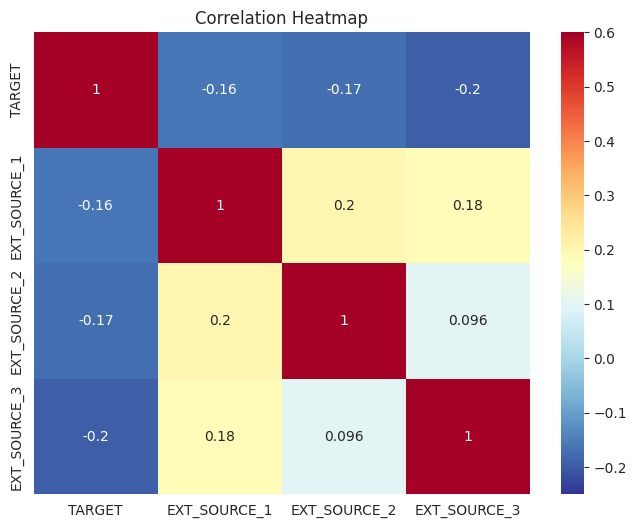

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Ketiga fitur EXT_SOURCE memiliki korelasi negatif dengan target, yang menunjukkan bahwa seiring dengan peningkatan nilai EXT_SOURCE, klien cenderung membayar kembali pinjamannya.

### Correlations

In [ ]:
correlations = train.corr()['TARGET'].sort_values()

# Display correlations
print('       Most Positive Correlations\n', correlations.tail(10))
print('\n     Most Negative Correlations\n', correlations.head(10))

       Most Positive Correlations
 REGION_RATING_CLIENT           0.069947
REGION_RATING_CLIENT_W_CITY    0.071166
DAYS_ID_PUBLISH                0.072557
DAYS_EMPLOYED                  0.088400
TARGET                         1.000000
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_2                     NaN
FLAG_DOCUMENT_7                     NaN
FLAG_DOCUMENT_10                    NaN
FLAG_DOCUMENT_12                    NaN
Name: TARGET, dtype: float64

     Most Negative Correlations
 EXT_SOURCE_3                 -0.195988
EXT_SOURCE_2                 -0.170661
EXT_SOURCE_1                 -0.162566
DAYS_BIRTH                   -0.091807
AMT_GOODS_PRICE              -0.050480
AMT_CREDIT                   -0.043201
FLAG_PHONE                   -0.034243
FLOORSMIN_AVG                -0.032316
FLOORSMIN_MEDI               -0.032307
REGION_POPULATION_RELATIVE   -0.031621
Name: TARGET, dtype: float64


### Correlations Matrix with Heatmap¶
Korelasi menyatakan bagaimana fitur terkait satu sama lain atau variabel target.

Korelasi bisa positif (peningkatan satu nilai fitur meningkatkan nilai variabel target) atau negatif (peningkatan satu nilai fitur menurunkan nilai variabel target).

Peta panas memudahkan untuk mengidentifikasi fitur mana yang paling terkait dengan variabel target, kami akan memplot peta panas dari fitur yang berkorelasi menggunakan perpustakaan seaborn.

In [ ]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = train.corr().abs()
#corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()


# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 33 columns to remove.


In [ ]:
# Showing name columns will remove
to_drop

['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [ ]:
# Drop the Columns
to_drop =['REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_POPULATION_RELATIVE']

In [ ]:
# Comparing Shape of Data Training Before and After
print('Comparing Shape of Data Training Before and After')
print('_________________________________________________')
print(' ')
print('      Training shape:     ', train.shape)
train_new = train.drop(columns = to_drop)
print('      New Training shape: ', train_new.shape)

Comparing Shape of Data Training Before and After
_________________________________________________
 
      Training shape:      (9692, 122)
      New Training shape:  (9692, 87)


This step only shows the process results from using the heatmap correlation and the results from this step are not continued to the next step of the process.

# Data Preparation

In [ ]:
# Missing Value for Data Train
for i in train.columns:
    if train[i].isnull().sum()!=0:
        print(i,train[i].isnull().sum())

AMT_GOODS_PRICE 7
NAME_TYPE_SUITE 40
DAYS_BIRTH 1
DAYS_EMPLOYED 1720
DAYS_REGISTRATION 1
DAYS_ID_PUBLISH 1
OWN_CAR_AGE 6464
FLAG_MOBIL 1
FLAG_EMP_PHONE 1
FLAG_WORK_PHONE 1
FLAG_CONT_MOBILE 1
FLAG_PHONE 1
FLAG_EMAIL 1
OCCUPATION_TYPE 2996
CNT_FAM_MEMBERS 1
REGION_RATING_CLIENT 1
REGION_RATING_CLIENT_W_CITY 1
WEEKDAY_APPR_PROCESS_START 1
HOUR_APPR_PROCESS_START 1
REG_REGION_NOT_LIVE_REGION 1
REG_REGION_NOT_WORK_REGION 1
LIVE_REGION_NOT_WORK_REGION 1
REG_CITY_NOT_LIVE_CITY 1
REG_CITY_NOT_WORK_CITY 1
LIVE_CITY_NOT_WORK_CITY 1
ORGANIZATION_TYPE 1
EXT_SOURCE_1 5462
EXT_SOURCE_2 27
EXT_SOURCE_3 1926
APARTMENTS_AVG 4901
BASEMENTAREA_AVG 5631
YEARS_BEGINEXPLUATATION_AVG 4715
YEARS_BUILD_AVG 6432
COMMONAREA_AVG 6755
ELEVATORS_AVG 5137
ENTRANCES_AVG 4842
FLOORSMAX_AVG 4779
FLOORSMIN_AVG 6578
LANDAREA_AVG 5707
LIVINGAPARTMENTS_AVG 6625
LIVINGAREA_AVG 4844
NONLIVINGAPARTMENTS_AVG 6720
NONLIVINGAREA_AVG 5300
APARTMENTS_MODE 4901
BASEMENTAREA_MODE 5631
YEARS_BEGINEXPLUATATION_MODE 4715
YEARS_BUILD_MO

In [ ]:
# Function to calculate missing values by column
# Function credits from Will Koehrsen
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
missing_values = missing_values_table(train)
missing_values.head(10)

Your selected dataframe has 122 columns.
There are 107 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,6755,69.7
COMMONAREA_AVG,6755,69.7
COMMONAREA_MODE,6755,69.7
NONLIVINGAPARTMENTS_AVG,6720,69.3
NONLIVINGAPARTMENTS_MODE,6720,69.3
NONLIVINGAPARTMENTS_MEDI,6720,69.3
FONDKAPREMONT_MODE,6641,68.5
LIVINGAPARTMENTS_MEDI,6625,68.4
LIVINGAPARTMENTS_MODE,6625,68.4
LIVINGAPARTMENTS_AVG,6625,68.4


In [ ]:
# Dropping Columns
cols_to_drop = [c for c in train.columns if train[c].isnull().sum() > 75000]
train, test = train.drop(cols_to_drop, axis=1), test.drop(cols_to_drop, axis=1)
test.isnull().sum().sort_values(ascending=False).head(10)

NONLIVINGAPARTMENTS_AVG     6655
NONLIVINGAPARTMENTS_MODE    6655
NONLIVINGAPARTMENTS_MEDI    6655
COMMONAREA_AVG              6641
COMMONAREA_MODE             6641
COMMONAREA_MEDI             6641
FONDKAPREMONT_MODE          6550
LIVINGAPARTMENTS_AVG        6526
LIVINGAPARTMENTS_MODE       6526
LIVINGAPARTMENTS_MEDI       6526
dtype: int64

In [ ]:
# Filling other missing value
obj_cols = train.select_dtypes('object').columns
obj_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
# Filling string cols with 'Not specified'
train[obj_cols] = train[obj_cols].fillna('Not specified')
test[obj_cols] = test[obj_cols].fillna('Not specified')

In [ ]:
# Change columns types to float
float_cols = train.select_dtypes('float').columns
float_cols

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=103)

In [ ]:
# Filling float values with median of train (not test)
train[float_cols] = train[float_cols].fillna(train[float_cols].median())
test[float_cols] = test[float_cols].fillna(test[float_cols].median())

In [ ]:
# Rows and columns Data
train.shape, test.shape

((9692, 122), (9647, 121))

In [ ]:
# Check NaN Value Train Data
train.isnull().sum().sort_values(ascending=False).head()

SK_ID_CURR                  0
OBS_30_CNT_SOCIAL_CIRCLE    0
WALLSMATERIAL_MODE          0
TOTALAREA_MODE              0
HOUSETYPE_MODE              0
dtype: int64

In [ ]:
# Check NaN Value Test Data
test.isnull().sum().sort_values(ascending=False).head(20)

SK_ID_CURR                      0
COMMONAREA_MODE                 0
EMERGENCYSTATE_MODE             0
WALLSMATERIAL_MODE              0
TOTALAREA_MODE                  0
HOUSETYPE_MODE                  0
FONDKAPREMONT_MODE              0
NONLIVINGAREA_MEDI              0
NONLIVINGAPARTMENTS_MEDI        0
LIVINGAREA_MEDI                 0
LIVINGAPARTMENTS_MEDI           0
LANDAREA_MEDI                   0
FLOORSMIN_MEDI                  0
FLOORSMAX_MEDI                  0
ENTRANCES_MEDI                  0
ELEVATORS_MEDI                  0
COMMONAREA_MEDI                 0
YEARS_BUILD_MEDI                0
YEARS_BEGINEXPLUATATION_MEDI    0
BASEMENTAREA_MEDI               0
dtype: int64

In [ ]:
# Check if there duplicated row
print('Duplicated Row')
print('_____________________')
print(' ')
print('Test duplicated:  ', test.duplicated().sum())
print('Train duplicated: ', train.duplicated().sum())

Duplicated Row
_____________________
 
Test duplicated:   0
Train duplicated:  0


In [ ]:
# Categorical Column
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               5
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     8
ORGANIZATION_TYPE             59
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
dtype: int64

## Step 1: Handling the dataset

### Split Columns "TARGET" with Data Train

In [ ]:
# Split data
test2 = test.copy(deep=True)
test2.index += len(train)+1
train_index = train.index
test_index = test2.index

# Split column target with data train
Y = train["TARGET"]
X = train.drop(columns=["TARGET"])

In [ ]:
# Temp
def get_train_test(df,y):
    train = list(set(train_index).intersection(df.index))
    test = list(set(test_index).intersection(df.index))
    return df.iloc[train], df.iloc[test], y.iloc[train]

### Merge Dataset Training and Testing

In [ ]:
# Merge dataset training and testing
# It is used for easy when cleaning

df = pd.concat([X,test2])
del(X)
del test2

### Handling Duplicated Value

In [ ]:
# Handling Duplicated Value
columns_without_id = [col for col in df.columns if col!='SK_ID_CURR']

# Checking for duplicates in the data
df[df.duplicated(subset = columns_without_id, keep=False)]
print('The number of duplicates in the data:',df[df.duplicated(subset= columns_without_id, keep=False)]
      .shape[0])
del columns_without_id

The number of duplicates in the data: 0


###  Handling Different Data Types

In [ ]:
# Change columns with FLAG word to type object
for _x in [i for i in df.columns if "FLAG" in i]:
    df[_x] = df[_x].apply(str)

## Step 2: Feature Engineering

In [ ]:
#@title Made Utiltias Function

def aggregration_fnc(df,ID, COLS,type,table=""):
    COLS = COLS+[ID]
    agg= df[COLS].groupby(ID, as_index = False).agg(type).reset_index()
    # List of column names
    columns = [ID]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the id name
        if var != ID:

            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (var, stat.upper(),table))
    agg.columns = columns
    return agg

def merge_all(innit_df,list_df: list, index_key:str):
    df = innit_df.copy(deep=True)
    for dx in list_df:
        df = df.merge(dx, on=index_key, how='left')
    return df

def get_categorical_count(df,col,id,table=""):
    return pd.get_dummies(df[[id,col]]).groupby(id,as_index=False).sum().rename(columns = {col: col+"_"+table})

In [ ]:
#@title Table Bureau Balance

df_bureau_balance = pd.read_csv("bureau_balance.csv")
bureau_balance = df_bureau_balance.groupby("SK_ID_BUREAU",as_index=False)["MONTHS_BALANCE"].min().rename(columns = {'MONTHS_BALANCE': 'OLDEST_MONTH_BALANCE'})
bureau_balance["MONTHS_BALANCE"] = 0
bureau_balance["CURR_BALANCE_STATUS"]= pd.merge(bureau_balance,df_bureau_balance, on=["SK_ID_BUREAU","MONTHS_BALANCE"], how='left' )["STATUS"]
del bureau_balance["MONTHS_BALANCE"]
del df_bureau_balance
gc.collect()
bureau_balance.sample()

,SK_ID_BUREAU,OLDEST_MONTH_BALANCE,CURR_BALANCE_STATUS
32922,6566258,-22.0,C


In [ ]:
#@title Table Bureau

# MENGGABUNGKAN DENGAN DATA LAMA
df_bureau = pd.read_csv("bureau.csv")
bureau = merge_all(df_bureau,[bureau_balance],"SK_ID_BUREAU")
bureau2 = get_categorical_count(bureau,'CURR_BALANCE_STATUS',"SK_ID_BUREAU")
bureau = merge_all(bureau,[bureau2],"SK_ID_BUREAU")


previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'bureau_previous_loan_CNT'})

credit_status = get_categorical_count(bureau,'CREDIT_ACTIVE',"SK_ID_CURR","bureau")
# MEDIAN, MAX
bureau_1 = aggregration_fnc(bureau,"SK_ID_CURR",[
    "AMT_CREDIT_MAX_OVERDUE","AMT_CREDIT_SUM","CURR_BALANCE_STATUS_5",
    "CURR_BALANCE_STATUS_1","CURR_BALANCE_STATUS_C"
    ],["median","max"],"bureau")
bureau_2 = aggregration_fnc(bureau,"SK_ID_CURR",["DAYS_CREDIT","CREDIT_DAY_OVERDUE"],["min","max"],"bureau")
# MIN, MAX
bureau = merge_all(previous_loan_counts,[credit_status,bureau_1,bureau_2],"SK_ID_CURR")
del previous_loan_counts
del credit_status
del bureau_1
del bureau_2
del bureau_balance
del df_bureau

print("Variabel Name: bureau")
bureau.sample()

Variabel Name: bureau


,SK_ID_CURR,bureau_previous_loan_CNT,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,AMT_CREDIT_MAX_OVERDUE_MEDIAN_bureau,AMT_CREDIT_MAX_OVERDUE_MAX_bureau,AMT_CREDIT_SUM_MEDIAN_bureau,AMT_CREDIT_SUM_MAX_bureau,CURR_BALANCE_STATUS_5_MEDIAN_bureau,CURR_BALANCE_STATUS_5_MAX_bureau,CURR_BALANCE_STATUS_1_MEDIAN_bureau,CURR_BALANCE_STATUS_1_MAX_bureau,CURR_BALANCE_STATUS_C_MEDIAN_bureau,CURR_BALANCE_STATUS_C_MAX_bureau,DAYS_CREDIT_MIN_bureau,DAYS_CREDIT_MAX_bureau,CREDIT_DAY_OVERDUE_MIN_bureau,CREDIT_DAY_OVERDUE_MAX_bureau
732,159883,5,3,0,2,0,NaN,NaN,53955.0,470250.0,0.0,0,0.0,0,0.0,0,-1280,-14,0,0


In [ ]:
#@title Table Cash Balance

df_cash_balance = pd.read_csv('POS_CASH_balance.csv')
previous_loan_counts = df_cash_balance.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'HC_previous_loan_CNT'})
pos_cash = get_categorical_count(df_cash_balance[
    df_cash_balance.NAME_CONTRACT_STATUS.isin(["Active","Completed","Amortized debt"])],
                                 'NAME_CONTRACT_STATUS',"SK_ID_CURR","POS_cash")
# Cari yang statusnya active sama completed sama Amortized debt [DONE]
#Cari yang latest installemnt payment [DONE]
pos_cash["MONTHS_BALANCE"] = -1
pos_cash["LATEST_INSTALMENT"] = pd.merge(pos_cash,df_cash_balance,on=["SK_ID_CURR","MONTHS_BALANCE"],how='left')["CNT_INSTALMENT_FUTURE"]

pos_cash2 = aggregration_fnc(df_cash_balance,"SK_ID_CURR",["SK_DPD"],["min","median"],"cash")

pos_cash = merge_all(pos_cash,[previous_loan_counts,pos_cash2],"SK_ID_CURR")
del pos_cash["MONTHS_BALANCE"]
del previous_loan_counts
del df_cash_balance
del pos_cash2

print("Variabel Name: pos_cash")
pos_cash.sample()

Variabel Name: pos_cash


,SK_ID_CURR,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,LATEST_INSTALMENT,HC_previous_loan_CNT,SK_DPD_MIN_cash,SK_DPD_MEDIAN_cash
101325,262598,1,0,NaN,1,0.0,0.0


In [ ]:
#@title Table Credit Card Balance

df_credit_card = pd.read_csv("credit_card_balance.csv")
credit_card = get_categorical_count(df_credit_card[
    df_credit_card.NAME_CONTRACT_STATUS.isin(["Active","Completed","Refused"])],
                                 'NAME_CONTRACT_STATUS',"SK_ID_CURR","credit_card")
credit_card2 = aggregration_fnc(df_credit_card,"SK_ID_CURR",[
    "AMT_BALANCE","AMT_PAYMENT_TOTAL_CURRENT","AMT_RECIVABLE",
    "CNT_DRAWINGS_CURRENT", "AMT_DRAWINGS_CURRENT"
    ],["median","sum"],"credit_card")
credit_card3 =  aggregration_fnc(df_credit_card,"SK_ID_CURR",["SK_DPD"
    ],["min","median"],"credit_card")

credit_card = merge_all(credit_card,[credit_card2, credit_card3],"SK_ID_CURR")
del credit_card2
del credit_card3
del df_credit_card
gc.collect()

print("Variabel Name: credit_card")
credit_card.sample()

Variabel Name: credit_card


,SK_ID_CURR,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,AMT_BALANCE_MEDIAN_credit_card,AMT_BALANCE_SUM_credit_card,AMT_PAYMENT_TOTAL_CURRENT_MEDIAN_credit_card,AMT_PAYMENT_TOTAL_CURRENT_SUM_credit_card,AMT_RECIVABLE_MEDIAN_credit_card,AMT_RECIVABLE_SUM_credit_card,CNT_DRAWINGS_CURRENT_MEDIAN_credit_card,CNT_DRAWINGS_CURRENT_SUM_credit_card,AMT_DRAWINGS_CURRENT_MEDIAN_credit_card,AMT_DRAWINGS_CURRENT_SUM_credit_card,SK_DPD_MIN_credit_card,SK_DPD_MEDIAN_credit_card
18052,197619,2,0,206028.8325,412057.665,34100.505,68201.01,204683.3325,409366.665,1.0,2.0,4500.0,9000.0,0.0,0.0


In [ ]:
#@title Table Previous Application

df_previous_application = pd.read_csv("previous_application.csv")
previous_application = get_categorical_count(df_previous_application[
    df_previous_application.NAME_CONTRACT_TYPE.isin(["Cash loans","Consumer loans","Revolving loans"])],
                                 'NAME_CONTRACT_STATUS',"SK_ID_CURR","apply_prev")
previous_application2 =  aggregration_fnc(df_previous_application,"SK_ID_CURR",["AMT_CREDIT",
 "AMT_GOODS_PRICE",
 "AMT_APPLICATION", "RATE_DOWN_PAYMENT",
 "RATE_INTEREST_PRIMARY", "CNT_PAYMENT"],["median"],"apply_prev")

previous_application = merge_all(previous_application,[previous_application2],"SK_ID_CURR")
del previous_application2
del df_previous_application
gc.collect()

print("Variabel Name: previous_application")
previous_application.sample()

Variabel Name: previous_application


,SK_ID_CURR,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,AMT_CREDIT_MEDIAN_apply_prev,AMT_GOODS_PRICE_MEDIAN_apply_prev,AMT_APPLICATION_MEDIAN_apply_prev,RATE_DOWN_PAYMENT_MEDIAN_apply_prev,RATE_INTEREST_PRIMARY_MEDIAN_apply_prev,CNT_PAYMENT_MEDIAN_apply_prev
49214,385418,1,0,0,0,251572.5,225000.0,225000.0,NaN,NaN,6.0


In [ ]:
#@title Table Installments Payments

# INSTALLMENT_DATE = DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT
# AMOUT INSTALLMENT MED, AMOUNT PAYMENT, MAX, MIN
df_installments_payments = pd.read_csv("installments_payments.csv")
installments_payments = df_installments_payments.copy(deep=True)
installments_payments["DAYS_TELAT_BAYAR"] = df_installments_payments.DAYS_ENTRY_PAYMENT - df_installments_payments.DAYS_INSTALMENT

installments_payments2 =  aggregration_fnc(installments_payments,"SK_ID_CURR",[
    "AMT_INSTALMENT","AMT_PAYMENT","DAYS_TELAT_BAYAR"],["median","max","min"],"installment")
installments_payments = merge_all(installments_payments2,[installments_payments2],"SK_ID_CURR")

del installments_payments2
del df_installments_payments
gc.collect()

print("Variabel Name: installments_payments")
installments_payments.sample()

Variabel Name: installments_payments


,SK_ID_CURR,AMT_INSTALMENT_MEDIAN_installment_x,AMT_INSTALMENT_MAX_installment_x,AMT_INSTALMENT_MIN_installment_x,AMT_PAYMENT_MEDIAN_installment_x,AMT_PAYMENT_MAX_installment_x,AMT_PAYMENT_MIN_installment_x,DAYS_TELAT_BAYAR_MEDIAN_installment_x,DAYS_TELAT_BAYAR_MAX_installment_x,DAYS_TELAT_BAYAR_MIN_installment_x,AMT_INSTALMENT_MEDIAN_installment_y,AMT_INSTALMENT_MAX_installment_y,AMT_INSTALMENT_MIN_installment_y,AMT_PAYMENT_MEDIAN_installment_y,AMT_PAYMENT_MAX_installment_y,AMT_PAYMENT_MIN_installment_y,DAYS_TELAT_BAYAR_MEDIAN_installment_y,DAYS_TELAT_BAYAR_MAX_installment_y,DAYS_TELAT_BAYAR_MIN_installment_y
33739,145055,9066.87,9066.87,9066.87,9066.87,9066.87,9066.87,-10.0,-10.0,-10.0,9066.87,9066.87,9066.87,9066.87,9066.87,9066.87,-10.0,-10.0,-10.0


In [ ]:
# Merge a few sub data
dataset_new = [bureau, pos_cash, credit_card, previous_application, installments_payments]

## Step 3: Checking Back

### Handling Null Data

In [ ]:
# Merge all the datasets
df = merge_all(df, dataset_new, "SK_ID_CURR" )

In [ ]:
# Show the null of the data
def null_ratio(df, limit=-1):
  percent_missing = df.isnull().sum() * 100 / len(df)
  df_result = pd.DataFrame({
      "filled":df.notnull().sum(),
      "N null":df.isna().sum(),
      "null_ratio(%)": percent_missing,
      }
  )
  nr =  df_result.sort_values("null_ratio(%)",ascending=False)
  return nr[nr["null_ratio(%)"] > limit]

In [ ]:
null_ratio(df,0)

,filled,N null,null_ratio(%)
RATE_INTEREST_PRIMARY_MEDIAN_apply_prev,18,19321,99.906924
AMT_CREDIT_MAX_OVERDUE_MEDIAN_bureau,211,19128,98.908940
AMT_CREDIT_MAX_OVERDUE_MAX_bureau,211,19128,98.908940
CURR_BALANCE_STATUS_1_MEDIAN_bureau,289,19050,98.505610
CURR_BALANCE_STATUS_5_MAX_bureau,289,19050,98.505610
...,...,...,...
AMT_PAYMENT_MAX_installment_x,14707,4632,23.951600
AMT_PAYMENT_MEDIAN_installment_x,14707,4632,23.951600
AMT_INSTALMENT_MIN_installment_x,14707,4632,23.951600
AMT_INSTALMENT_MAX_installment_x,14707,4632,23.951600


In [ ]:
# Limit the best of null_ratio(%)
NULL_TRESHOLD = 70

In [ ]:
# Save the column that unwanted to use
UNWANTED_COLUMN = ["SK_ID_CURR"]

# Columns that have null_ratio(%) > 65% will be deleted
UNWANTED_COLUMN.extend(null_ratio(df,NULL_TRESHOLD).index)

### Fill Missing Value

In [ ]:
# Making function about handling missing value
def handling_missing(df,start_from=0, end_to=100):
    dn = null_ratio(df,start_from)
    for col in dn.index:
        nr  = float(dn.loc[col,'null_ratio(%)'])
        if  nr < end_to:
            # Data type object will fill in with mode
            if str(df[col].dtypes)=='object' :
                df[col] = df[col].fillna(df[col].mode()[0])
            # Data type numeric will fill in with median
            else:
                df[col] = df[col].fillna(df[col].median())

In [ ]:
# Handle the missing value
handling_missing(df,end_to=NULL_TRESHOLD)

# Show the data after the handling
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bureau_previous_loan_CNT,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,AMT_CREDIT_MAX_OVERDUE_MEDIAN_bureau,AMT_CREDIT_MAX_OVERDUE_MAX_bureau,AMT_CREDIT_SUM_MEDIAN_bureau,AMT_CREDIT_SUM_MAX_bureau,CURR_BALANCE_STATUS_5_MEDIAN_bureau,CURR_BALANCE_STATUS_5_MAX_bureau,CURR_BALANCE_STATUS_1_MEDIAN_bureau,CURR_BALANCE_STATUS_1_MAX_bureau,CURR_BALANCE_STATUS_C_MEDIAN_bureau,CURR_BALANCE_STATUS_C_MAX_bureau,DAYS_CREDIT_MIN_bureau,DAYS_CREDIT_MAX_bureau,CREDIT_DAY_OVERDUE_MIN_bureau,CREDIT_DAY_OVERDUE_MAX_bureau,NAME_CONTRACT_STATUS_Active_x,NAME_CONTRACT_STATUS_Completed_x,LATEST_INSTALMENT,HC_previous_loan_CNT,SK_DPD_MIN_cash,SK_DPD_MEDIAN_cash,NAME_CONTRACT_STATUS_Active_y,NAME_CONTRACT_STATUS_Completed_y,AMT_BALANCE_MEDIAN_credit_card,AMT_BALANCE_SUM_credit_card,AMT_PAYMENT_TOTAL_CURRENT_MEDIAN_credit_card,AMT_PAYMENT_TOTAL_CURRENT_SUM_credit_card,AMT_RECIVABLE_MEDIAN_credit_card,AMT_RECIVABLE_SUM_credit_card,CNT_DRAWINGS_CURRENT_MEDIAN_credit_card,CNT_DRAWINGS_CURRENT_SUM_credit_card,AMT_DRAWINGS_CURRENT_MEDIAN_credit_card,AMT_DRAWINGS_CURRENT_SUM_credit_card,SK_DPD_MIN_credit_card,SK_DPD_MEDIAN_credit_card,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer,AMT_CREDIT_MEDIAN_apply_prev,AMT_GOODS_PRICE_MEDIAN_apply_prev,AMT_APPLICATION_MEDIAN_apply_prev,RATE_DOWN_PAYMENT_MEDIAN_apply_prev,RATE_INTEREST_PRIMARY_MEDIAN_apply_prev,CNT_PAYMENT_MEDIAN_apply_prev,AMT_INSTALMENT_MEDIAN_installment_x,AMT_INSTALMENT_MAX_installment_x,AMT_INSTALMENT_MIN_installment_x,AMT_PAYMENT_MEDIAN_installment_x,AMT_PAYMENT_MAX_installment_x,AMT_PAYMENT_MIN_installment_x,DAYS_TELAT_BAYAR_MEDIAN_installment_x,DAYS_TELAT_BAYAR_MAX_installment_x,DAYS_TELAT_BAYAR_MIN_installment_x,AMT_INSTALMENT_M

In [ ]:
UNWANTED_COLUMN.extend(["NAME_TYPE_SUITE", "WEEKDAY_APPR_PROCESS_START",])

- **Name_Type_Suite** not used because it has no effect on
making predictions.
- **Weekday_Appr_Process_Start** not used because there is already an advance date.

In [ ]:
# Drop the data that unwanted columns to use
df.drop(columns=UNWANTED_COLUMN,inplace=True)
gc.collect()

0

# Modeling

In [ ]:
# Show the index of the Dataset Training and Testing
print(train_index)
print(test_index)

RangeIndex(start=0, stop=9692, step=1)
RangeIndex(start=9693, stop=19340, step=1)


In [ ]:
#@title One Hot Encoding
df = pd.get_dummies(df,drop_first=True)

In [ ]:
print('______________________________________________')

# Check the new of Rows & Columns
print('     Number of Rows:    ', df.shape[0])
print('     Number of Colums:  ', df.shape[1])

# Check The new of data type
print('______________________________________________')
print(df.dtypes)

# Displaying the contents of the new data
df.head()

______________________________________________
     Number of Rows:     19339
     Number of Colums:   239
______________________________________________
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
AMT_CREDIT              float64
AMT_ANNUITY             float64
AMT_GOODS_PRICE         float64
                         ...   
FLAG_DOCUMENT_17_1.0      uint8
FLAG_DOCUMENT_18_1.0      uint8
FLAG_DOCUMENT_19_1.0      uint8
FLAG_DOCUMENT_20_1.0      uint8
FLAG_DOCUMENT_21_1.0      uint8
Length: 239, dtype: object


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_STATUS_Active_x,NAME_CONTRACT_STATUS_Completed_x,HC_previous_loan_CNT,SK_DPD_MIN_cash,SK_DPD_MEDIAN_cash,AMT_INSTALMENT_MEDIAN_installment_x,AMT_INSTALMENT_MAX_installment_x,AMT_INSTALMENT_MIN_installment_x,AMT_PAYMENT_MEDIAN_installment_x,AMT_PAYMENT_MAX_installment_x,AMT_PAYMENT_MIN_installment_x,DAYS_TELAT_BAYAR_MEDIAN_installment_x,DAYS_TELAT_BAYAR_MAX_installment_x,DAYS_TELAT_BAYAR_MIN_installment_x,AMT_INSTALMENT_MEDIAN_installment_y,AMT_INSTALMENT_MAX_installment_y,AMT_INSTALMENT_MIN_installment_y,AMT_PAYMENT_MEDIAN_installment_y,AMT_PAYMENT_MAX_installment_y,AMT_PAYMENT_MIN_installment_y,DAYS_TELAT_BAYAR_MEDIAN_installment_y,DAYS_TELAT_BAYAR_MAX_installment_y,DAYS_TELAT_BAYAR_MIN_installment_y,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_EMP_PHONE_1.0,FLAG_WORK_PHONE_1.0,FLAG_CONT_MOBILE_1.0,FLAG_PHONE_1.0,FLAG_EMAIL_1.0,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Not specified,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TY

In [ ]:
# Join the new data
df_X_train, df_X_test, Y1 = get_train_test(df,Y)

In [ ]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df_X_train, Y1, test_size=0.33, random_state=42)

## LightGBM
Show the modeling LightGBM with Cross Validation.

In [ ]:
# Utalitas Function for modeling LightGBM
def model(features, labels,test_features, encoding = 'ohe', n_folds = 5):

    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape:  ', test_features.shape)
    print('__________________________________')
    print(' ')

    # Extract feature names
    feature_names = list(features.columns)

    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)

    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))

    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []

    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):

        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]

        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary',
                                   class_weight = 'balanced', learning_rate = 0.05,
                                   reg_alpha = 0.1, reg_lambda = 0.1,
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'],
                  early_stopping_rounds = 100, verbose = 200)

        # Record the best iteration
        best_iteration = model.best_iteration_

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]

        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores})
    return  feature_importances, metrics, train_indices, valid_indices,model

In [ ]:
fi, metrics,train2,test2,lgboost_best = model(df_X_train, Y1, df_X_test)
print('______________________________')
print('       Baseline metrics       ')
print(' ')
print(metrics)

Training Data Shape:  (9692, 239)
Testing Data Shape:   (9646, 239)
__________________________________
 
[200]	train's auc: 0.999372	train's binary_logloss: 0.166497	valid's auc: 0.737935	valid's binary_logloss: 0.298314
______________________________
       Baseline metrics       
 
      fold     train     valid
0        0  0.971629  0.735515
1        1  0.923405  0.769977
2        2  0.968086  0.708515
3        3  0.988551  0.753446
4        4  0.903490  0.740762
5  overall  0.951032  0.729672


In [ ]:
def compute_roc_auc(clf,index):
    y_predict = clf.predict_proba(df_X_train.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(Y1.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

def metric_fnc(Model,train):
    Train = df_X_train.loc[train]
    print("Train Shape: ",Train.shape)
    print(" ")
    y_test  = Y1.loc[train]
    pred = Model.predict(Train)
    accuracy = accuracy_score(y_test,pred)
    fpr, tpr, auc_score = compute_roc_auc(Model,train)
    cm= confusion_matrix(y_test, pred)
    tn, fp, fn, tp =cm.ravel()
    pr = tp/(tp+fp)
    rc =tp/(tp+fn)

    sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%')
    print("__________________________________")
    print("Accuracy:    ",(tp+tn)/(tp+tn+fp+fn))
    print("F1:          ",(2*pr*rc)/pr+rc)
    print("Precision:   ",pr)
    print("Recall:      ",rc)
    print("Specifify:   ",(tn)/(tn+fp))
    print("__________________________________")
    print(" ")
    fig = px.area(
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc_score:.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500)
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1)

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

Train Shape:  (7754, 239)
 
__________________________________
Accuracy:     0.8034562806293526
F1:           2.6306156405990015
Precision:    0.2665655032878098
Recall:       0.8768718801996672
Specifify:    0.7972878512512233
__________________________________
 


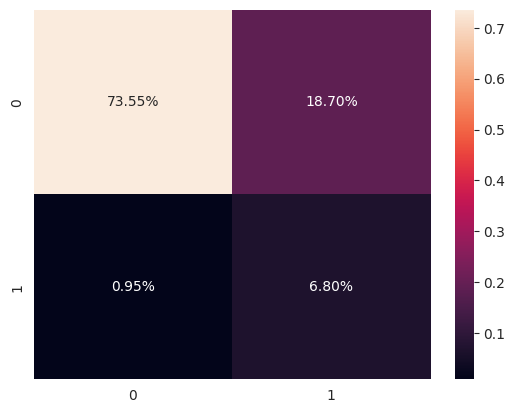

In [ ]:
metric_fnc(lgboost_best,train2)

## Random Forrest Classifier
Show the modeling Random Forrest Classifier with Cross Validation.

In [ ]:
def folds(Model,N_fold=5):
    model = clone(Model)
    cv = StratifiedKFold(n_splits=N_fold, random_state=123, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])
    fprs, tprs, scores = [], [], []

    for (train, test), i in zip(cv.split(df_X_train, Y1), range(5)):
        model.fit(df_X_train.iloc[train], Y1.iloc[train])

        _, _, auc_score_train = compute_roc_auc(model,train)
        fpr, tpr, auc_score = compute_roc_auc(model,test)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
    return pd.DataFrame(scores, columns=['AUC Train', 'AUC Test']),train,test,model

In [ ]:
# Random Forrest Classifier with Cross Validation
RFC = RandomForestClassifier(
      n_estimators=50,
      criterion='gini',
      max_depth=5,
      min_samples_split=2,
      min_samples_leaf=1,
      max_features='auto',
      bootstrap=True,
      class_weight='balanced'
)

M,rfc_best_train,rfc_best_test,rfc_best = folds(RFC)
print("_______________________")
print("   5-Fold AUC Metric   ")
print("_______________________")
print(" ")
M.tail()

_______________________
   5-Fold AUC Metric   
_______________________
 


,AUC Train,AUC Test
0,0.857490,0.699131
1,0.854190,0.734985
2,0.854219,0.654095
3,0.855330,0.714854
4,0.853697,0.726083


Train Shape:  (7754, 239)
 
__________________________________
Accuracy:     0.8055197317513542
F1:           2.096026490066225
Precision:    0.2414187643020595
Recall:       0.6986754966887417
Specifify:    0.8145454545454546
__________________________________
 


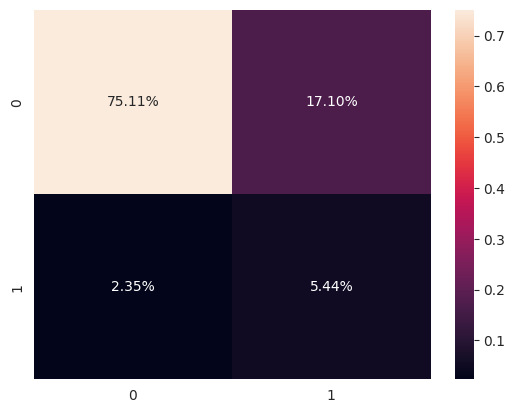

In [ ]:
metric_fnc(rfc_best,rfc_best_train)

## XGBoost Classifier
Show the modeling XGBoost Classifier with Cross Validation.

In [ ]:
# XGBoost Classifier with Cross Validation
XGB = {
      'objective':'binary:logistic',
      'max_depth': 4,
      'alpha': 10,
      'learning_rate': 1.0,
      'n_estimators':100}

M,xg_best_train,xg_best_test,xg_best = folds(XGBClassifier(**XGB))
print("_______________________")
print("   5-Fold AUC Metric   ")
print("_______________________")
print(" ")
M.tail()

_______________________
   5-Fold AUC Metric   
_______________________
 


,AUC Train,AUC Test
0,0.960872,0.711450
1,0.972247,0.685586
2,0.970863,0.682744
3,0.980788,0.712560
4,0.964789,0.731842


Train Shape:  (7754, 239)
 
__________________________________
Accuracy:     0.9463502708279597
F1:           0.9884105960264902
Precision:    0.9476190476190476
Recall:       0.3294701986754967
Specifify:    0.9984615384615385
__________________________________
 


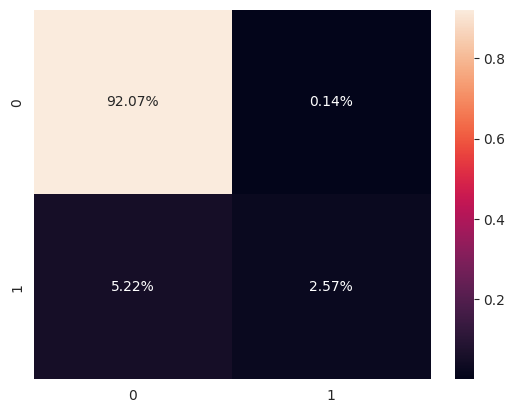

In [ ]:
metric_fnc(xg_best,xg_best_train)

#Evaluation and Deployment

Based on the results of the accuracy using the 3 modeling, the result is XGBoost Classifier modeling has the highest accuracy with a total of score 0.95 or 95% which is good for use this modeling to help Home Credit Group Risk data.

In [ ]:
def predict(model,index):
    model.fit(df_X_train.iloc[index], Y1.iloc[index])
    return model.predict(df_X_test), model.predict_proba(df_X_test)

def output_predict(model,index):
    X = df_X_test.copy(deep=True)
    pr = predict(model,index)
    print(pr[1])

In [ ]:
predict(xg_best,xg_best_train)

(array([0, 0, 0, ..., 0, 0, 0]),
 array([[0.982243  , 0.017757  ],
        [0.98550797, 0.01449202],
        [0.95841384, 0.04158619],
        ...,
        [0.97843516, 0.02156486],
        [0.9953421 , 0.0046579 ],
        [0.56913996, 0.43086007]], dtype=float32))

In [ ]:
output_predict(xg_best,xg_best_train)

[[0.982243   0.017757  ]
 [0.98550797 0.01449202]
 [0.95841384 0.04158619]
 ...
 [0.97843516 0.02156486]
 [0.9953421  0.0046579 ]
 [0.56913996 0.43086007]]


Dashboard: https://lookerstudio.google.com/reporting/b6605adf-c56b-4c3c-8f68-9130da7aad39/page/Nd7TD

##